In [8]:
EXPERIMENT_NOTEBOOK_PATH = "../../reports/experiments/2019-02-05_03-12/notebook.csv"


In [9]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [10]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,mean_late_val_acc,epoch
0,0.103,2.314,0.098,2.283,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,1
1,0.155,2.263,0.115,2.290,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,2
2,0.180,2.192,0.171,2.181,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,3
3,0.205,2.126,0.300,1.962,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,4
4,0.237,2.068,0.277,1.898,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,5


## Preprocess

### correct name of reward

In [11]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward,epoch
0,0.103,2.314,0.098,2.283,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,1
1,0.155,2.263,0.115,2.290,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,2
2,0.180,2.192,0.171,2.181,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,3
3,0.205,2.126,0.300,1.962,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,4
4,0.237,2.068,0.277,1.898,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,5


### add epoch info and accuracy overfit

In [12]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())
exp_df["epoch"] = exp_df.index % n_epochs
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward,epoch,acc_overfit
0,0.103,2.314,0.098,2.283,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,0.0,0.005
1,0.155,2.263,0.115,2.290,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,1.0,0.040
2,0.180,2.192,0.171,2.181,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,2.0,0.009
3,0.205,2.126,0.300,1.962,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,3.0,-0.095
4,0.237,2.068,0.277,1.898,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.523,4.0,-0.040


## Some info

In [13]:
print (f"number of trials:{exp_df.trial_no.unique().__len__()}")
print (f"number of samples for each trial:{exp_df.sample_no.unique().__len__()}")

number of trials:1453
number of samples for each trial:3


In [25]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*300

def plot_exp_lines(exp_df, plot=True):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        if plot==True:
            ############################################################
            # Accuracy plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,51,1)
                axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
                axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)

            axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                      "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[0].set_ylabel("accuracy", fontsize=20)

            ############################################################
            # Loss plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,51,1)
                axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
                axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)

            #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
            #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[1].set_xlabel("epochs", fontsize=20)
            axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        param5 = iter_df["aug3_type"].values[0]
        param6 = iter_df["aug3_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,param5,param6,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","aug3_type","aug3_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 1453


,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
136,137,fog,0.775,emboss,0.972,additive-gaussian-noise,0.089,0.776,0.566
232,233,fog,0.929,gamma-contrast,0.169,shear,0.982,0.950,0.557
95,96,fog,0.782,sharpen,0.959,fog,0.280,0.594,0.556
188,189,emboss,0.544,coarse-dropout,0.934,fog,0.497,0.961,0.553
231,232,fog,0.792,gamma-contrast,0.194,shear,0.918,0.881,0.551
150,151,emboss,0.670,emboss,0.939,brighten,0.961,0.758,0.550
119,120,fog,0.831,translate-x,0.956,fog,0.119,0.689,0.549
195,196,fog,0.653,crop,0.962,fog,0.469,0.811,0.548
66,67,emboss,0.566,fog,0.907,gaussian-blur,0.685,0.981,0.548
124,125,fog,0.765,fog,0.774,fog,0.088,0.463,0.547


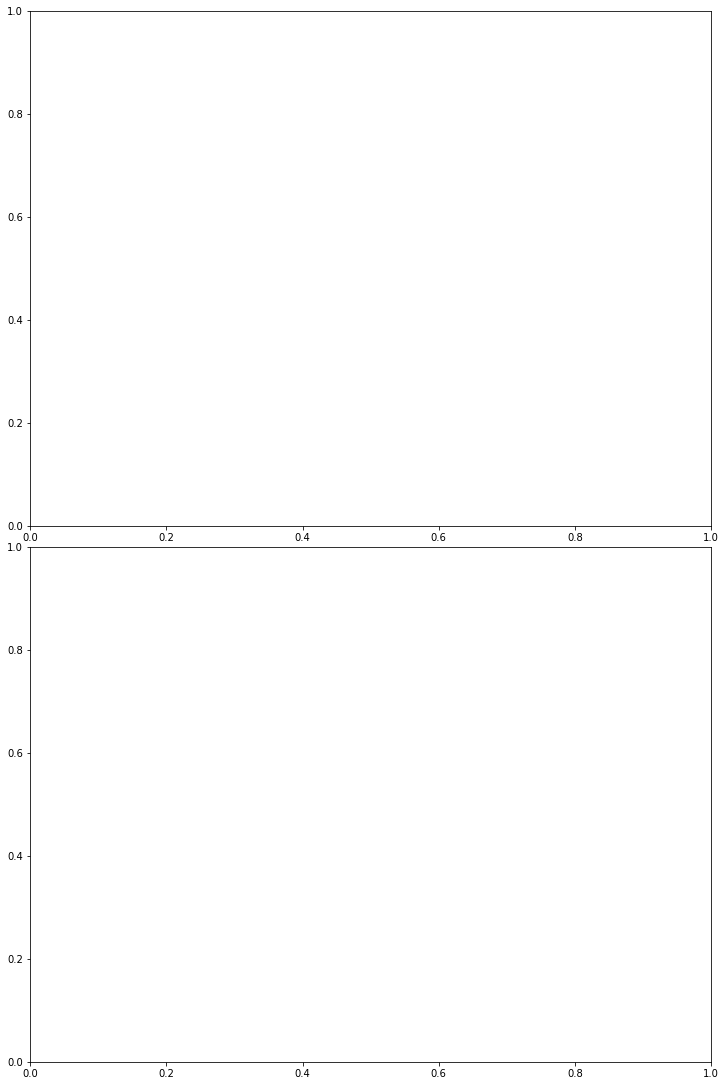

In [26]:
score_df = plot_exp_lines(exp_df, plot=False)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards trend

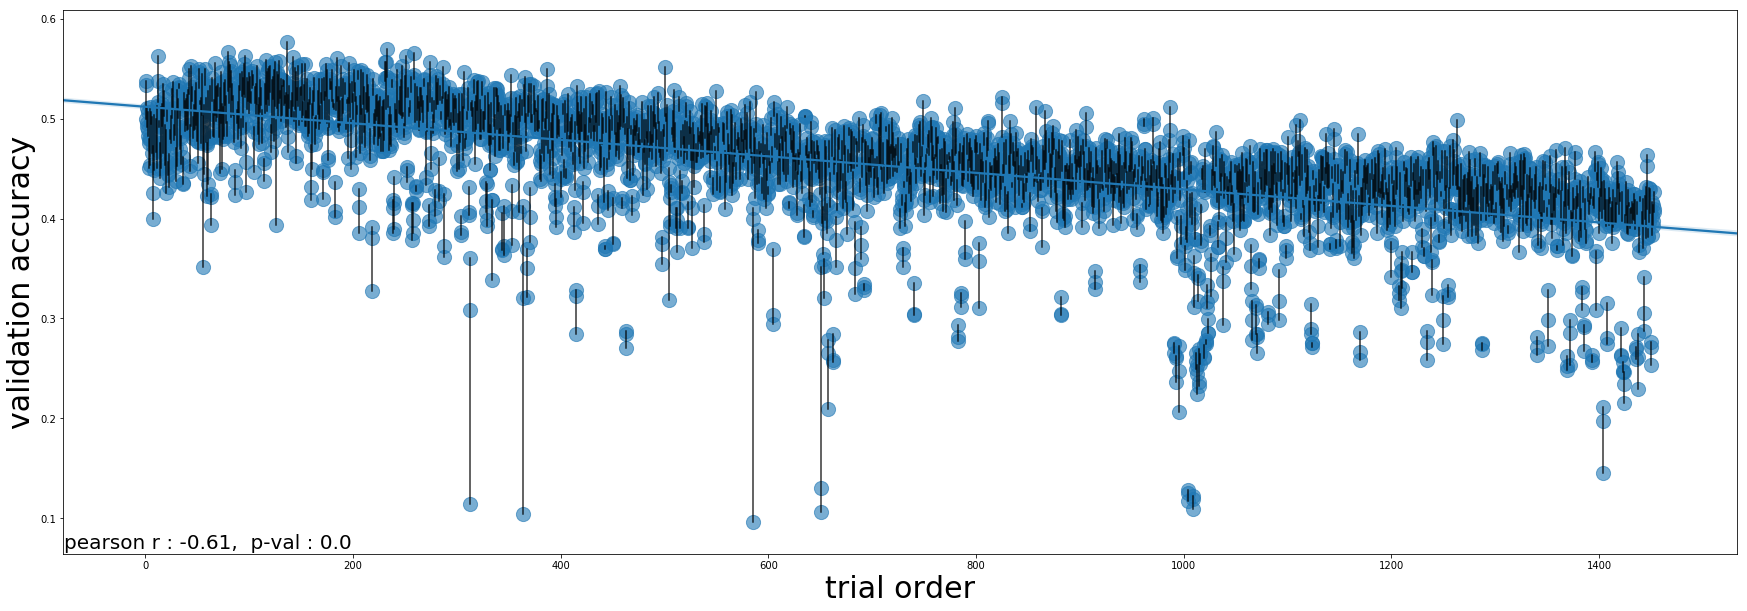

In [27]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

## How frequency of augmented images affect accuracy?

Text(0, 0.5, 'val_acc')

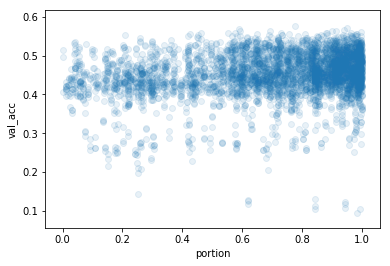

In [46]:
df = (exp_df[exp_df["acc_overfit"]<0.05]
         .sort_values("val_acc", ascending=False)
         .drop_duplicates(["trial_no","sample_no"])
     )[["portion","val_acc"]]

plt.scatter(df["portion"], df["val_acc"], alpha=0.1)
plt.xlabel("portion")
plt.ylabel("val_acc")

In [47]:
from scipy.stats import pearsonr

pearsonr(df["portion"], df["val_acc"])

(0.20742275757370945, 1.4322129665763956e-43)

In [29]:
exp_df.drop_duplicates("trial_no")["portion"].unique().__len__()

631

# Top 5 policy accuracy curves (they're overfitting for augmentation)

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
1,137,fog,0.775,emboss,0.972,additive-gaussian-noise,0.089,0.776,0.566
4,233,fog,0.929,gamma-contrast,0.169,shear,0.982,0.950,0.557
0,96,fog,0.782,sharpen,0.959,fog,0.280,0.594,0.556
2,189,emboss,0.544,coarse-dropout,0.934,fog,0.497,0.961,0.553
3,232,fog,0.792,gamma-contrast,0.194,shear,0.918,0.881,0.551


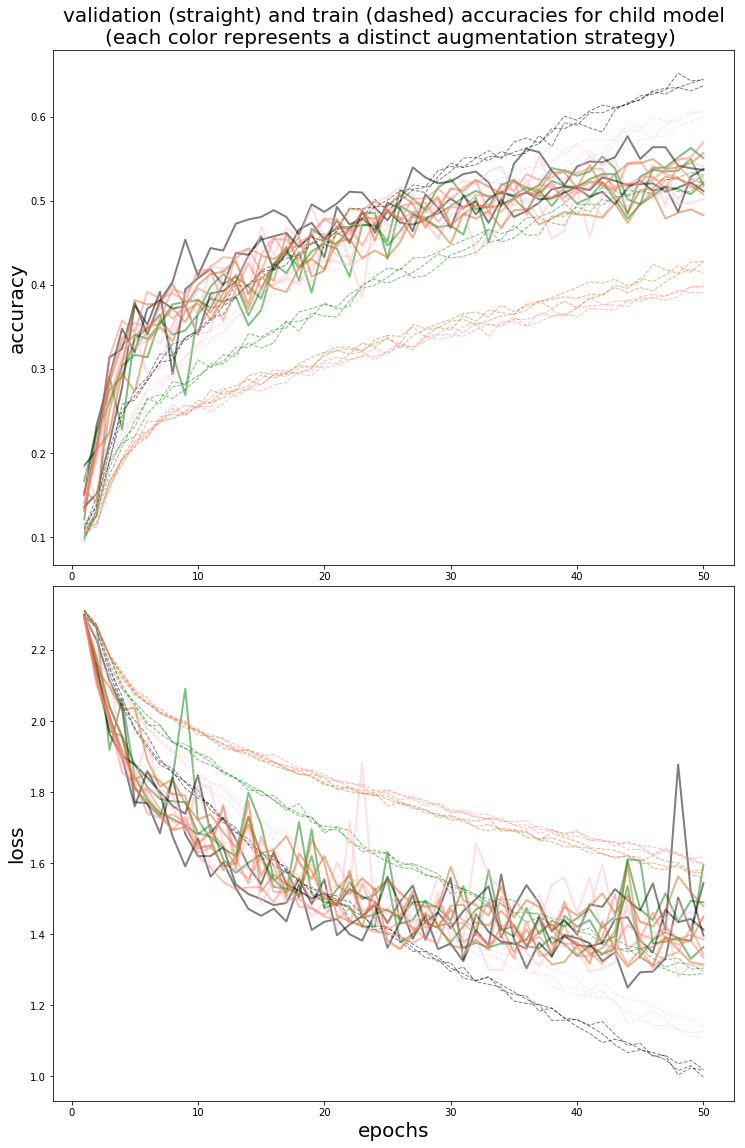

In [30]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
3,1004,invert,0.738,sharpen,0.026,gamma-contrast,0.992,0.621,0.121
4,1009,invert,0.290,translate-x,0.274,gamma-contrast,0.993,0.943,0.116
2,651,invert,0.225,gamma-contrast,0.950,translate-x,0.019,0.845,0.109
0,364,invert,0.709,gamma-contrast,0.895,translate-y,0.016,0.994,0.104
1,585,invert,0.398,gamma-contrast,0.877,translate-y,0.048,0.984,0.085


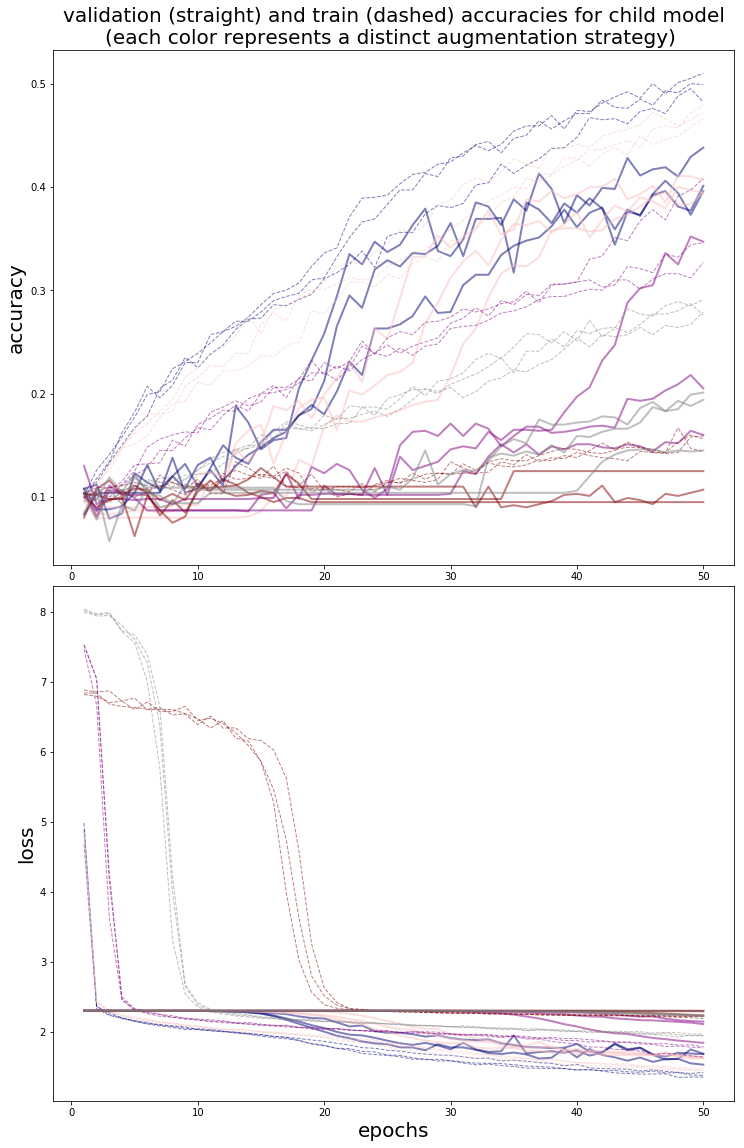

In [31]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

In [32]:
import sys
sys.path.insert(0,"../../")

from deepaugmenter.augmenter import Augmenter
augmenter=Augmenter()

In [33]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugmenter.build_features import DataOp

Using TensorFlow backend.


In [34]:
data, input_shape = DataOp.load("cifar10",1000)
data = DataOp.preprocess(data)

In [38]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)
    
def display_augmentation_by_steps(trial_no, df, data, nrows=4):
    from deepaugmenter.augmenter import transform
    trial_df = df[df["trial_no"]==trial_no]
    
    hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                   trial_df.iloc[0,7],trial_df.iloc[0,8],
                   trial_df.iloc[0,9],trial_df.iloc[0,10],
                   1.0] # proportion always 1
    
    X = data["X_train"]
    X_aug_1 = transform(hyperparams[0], hyperparams[1], X)
    X_aug_2 = transform(hyperparams[2], hyperparams[3], X_aug_1)
    X_aug_3 = transform(hyperparams[4], hyperparams[5], X_aug_2)
    
    ncols=4
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(ncols*10,nrows*10))
    fig.tight_layout()
    fig.suptitle("smt")
    
    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%4==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug_1[i])
            axes[int((i+2)/ncols)][(i+2)%ncols].imshow(X_aug_2[i])
            axes[int((i+3)/ncols)][(i+3)%ncols].imshow(X_aug_3[i])
    
    print (hyperparams)

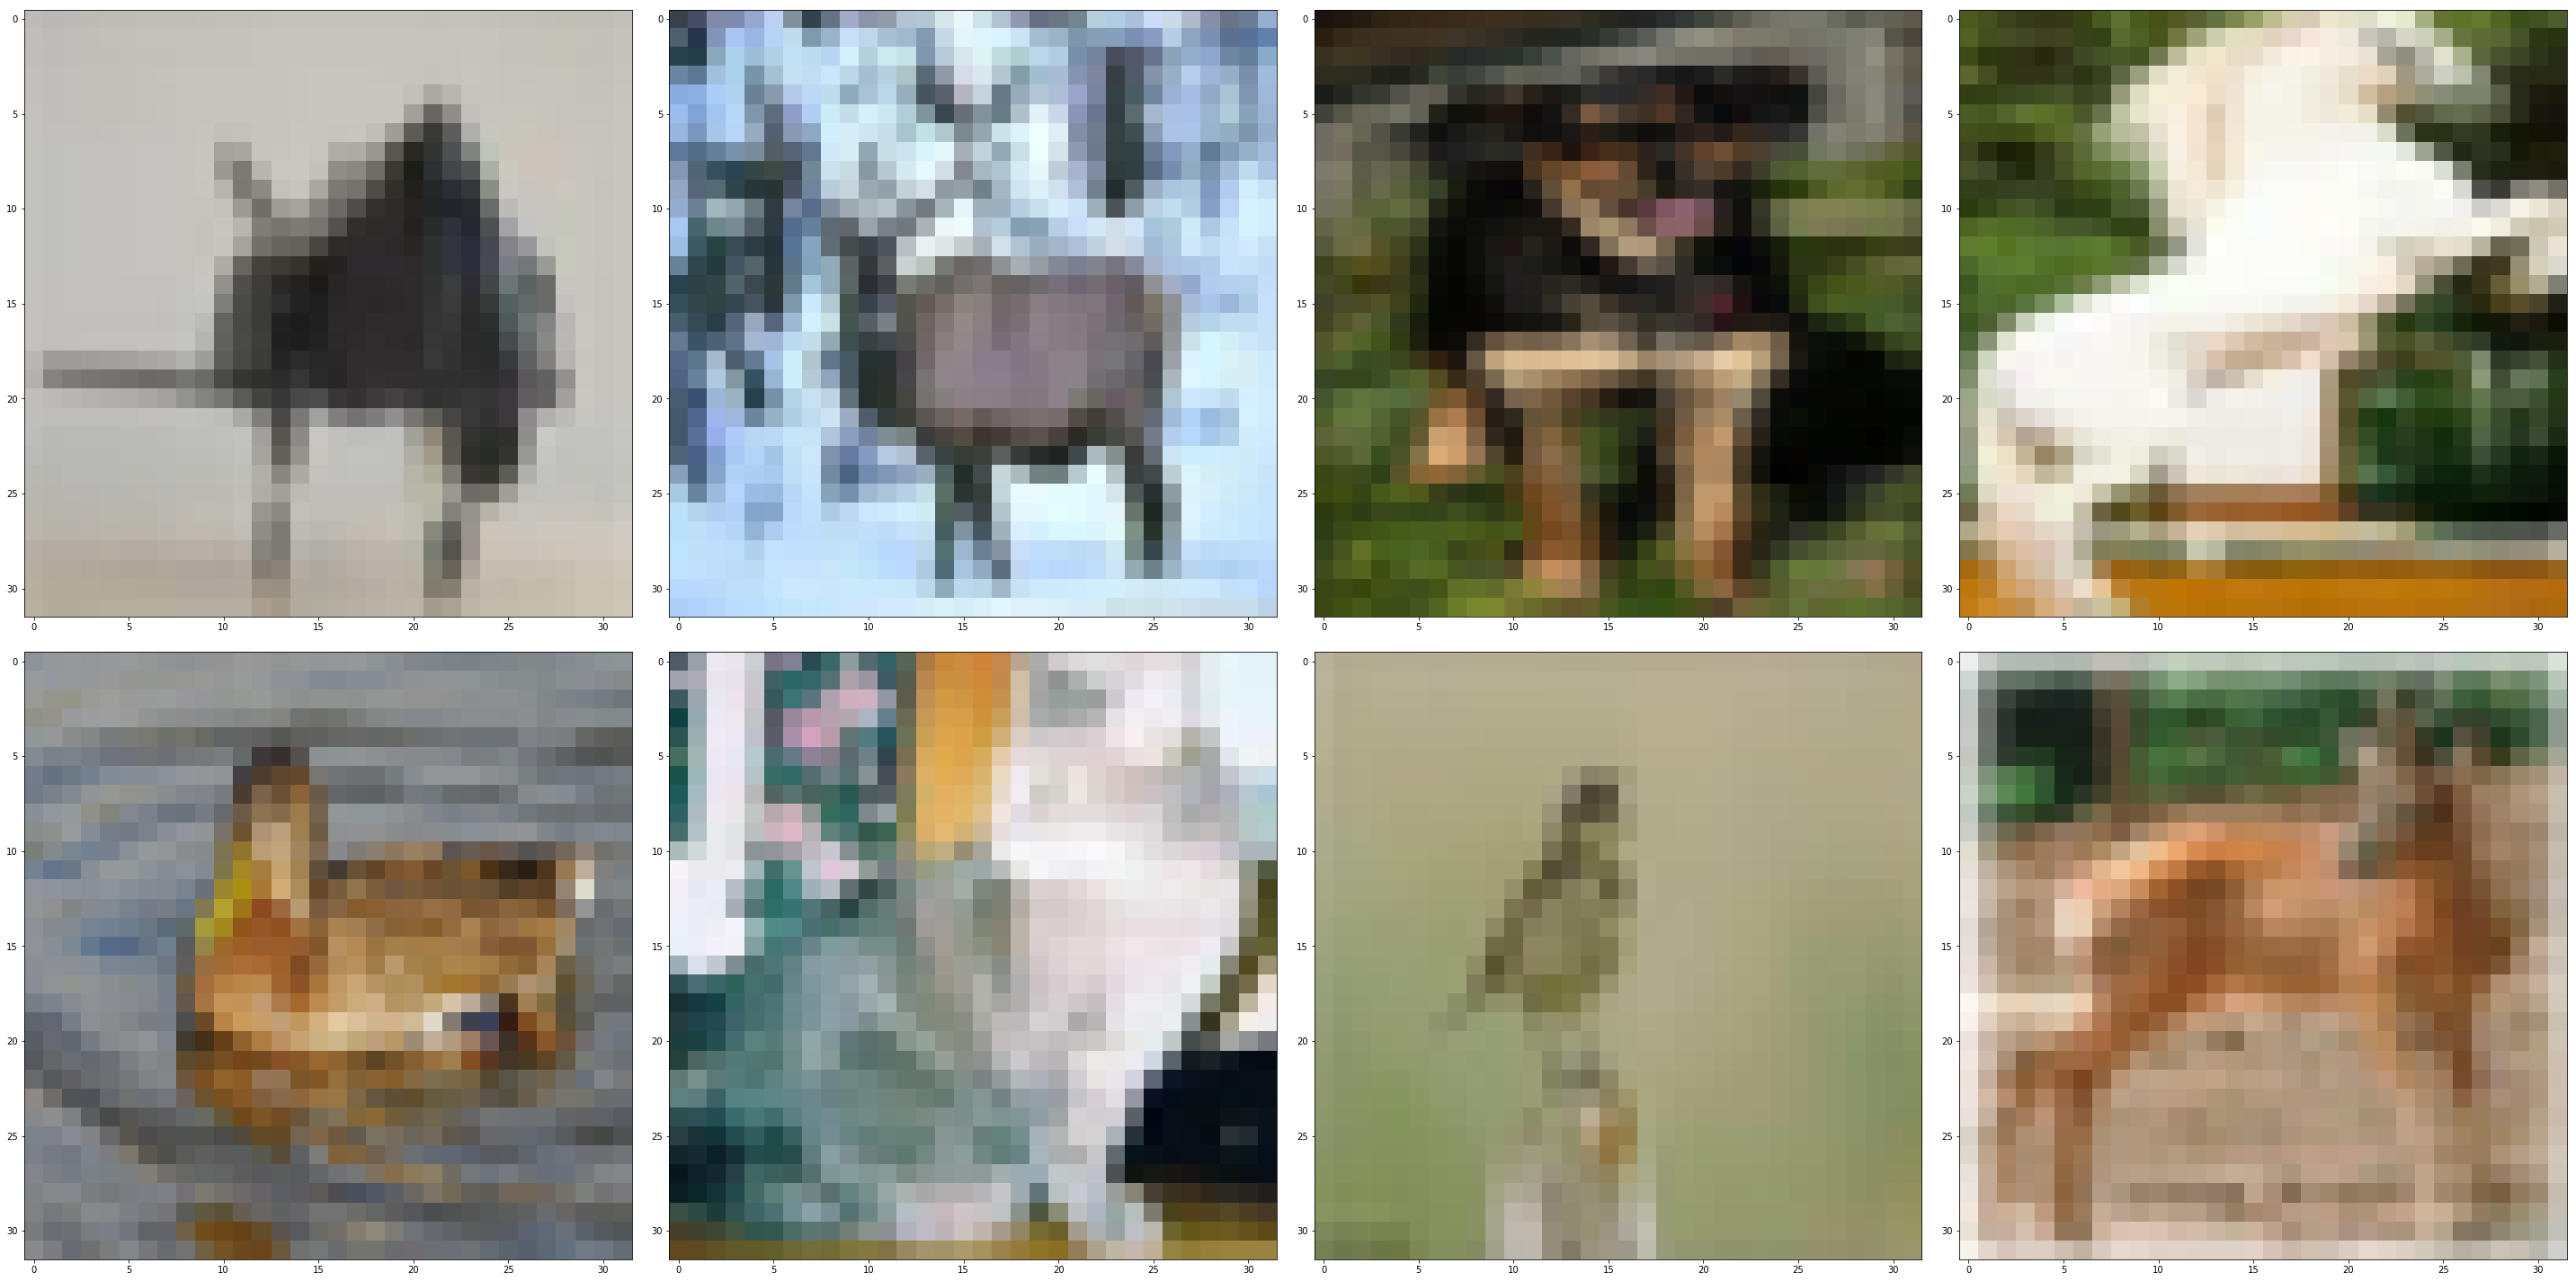

In [39]:
display_images(data["X_train"])

['gaussian-blur', 0.474, 'rotate', 0.737, 1.0]


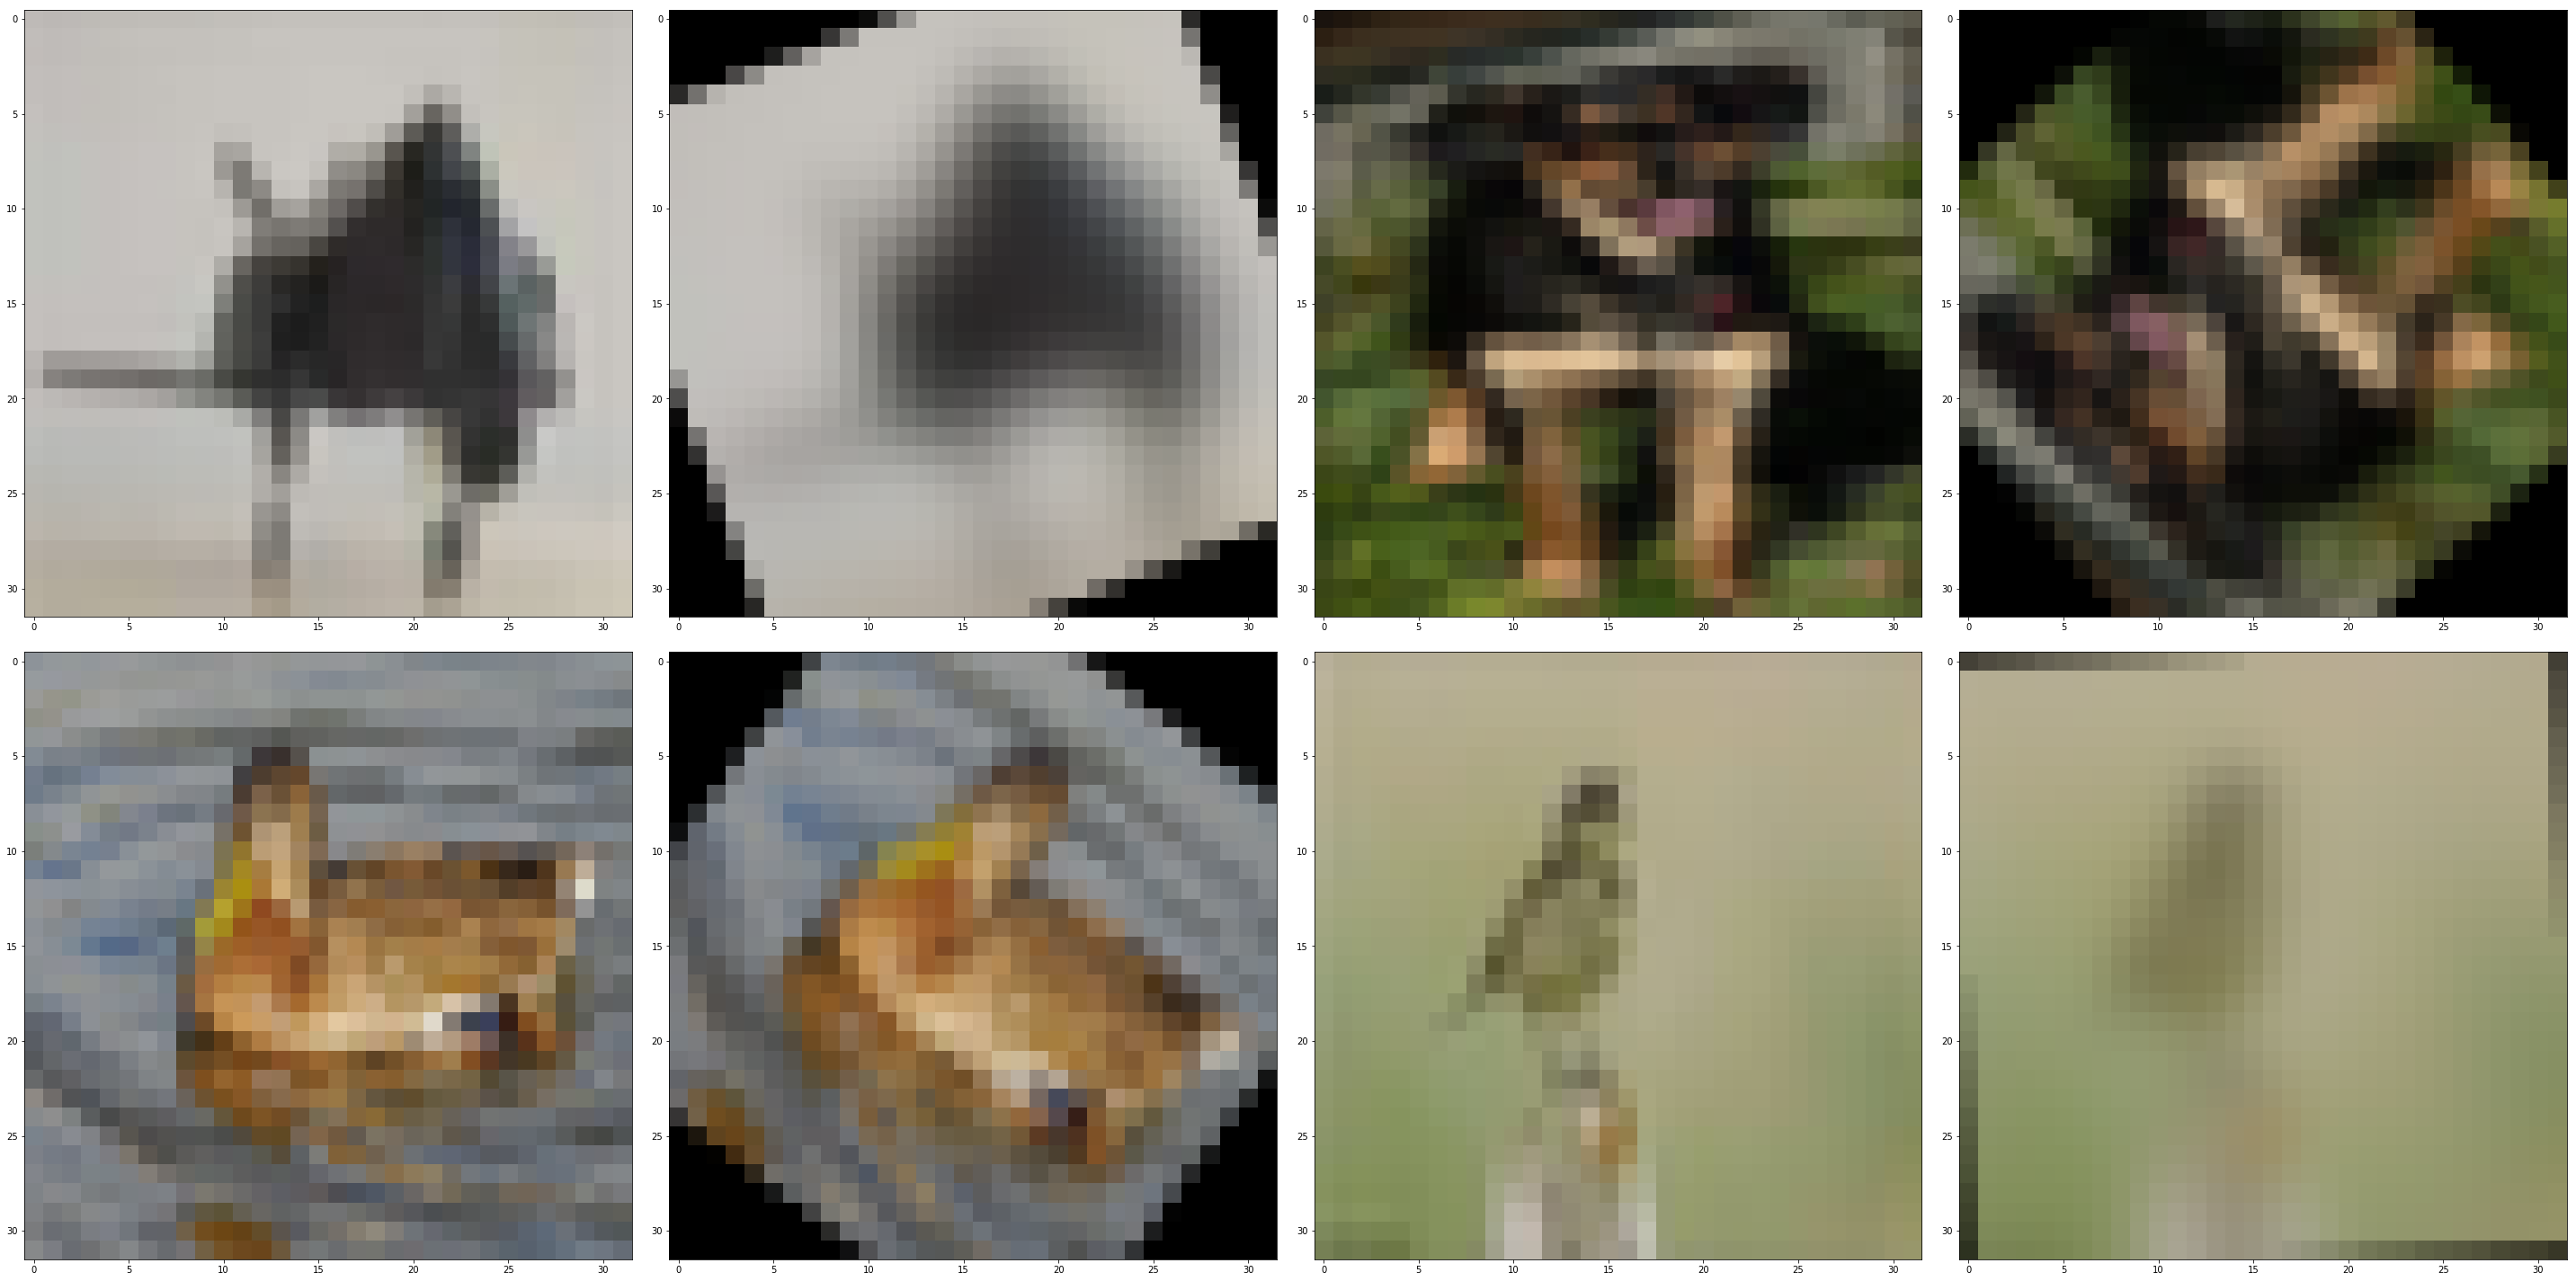

In [40]:
display_augmentation_by_trial_no(5, exp_df, data)

# Overfitting augmentations

137
['fog', 0.775, 'emboss', 0.972, 1.0]
233
['fog', 0.929, 'gamma-contrast', 0.16899999999999998, 1.0]
96
['fog', 0.782, 'sharpen', 0.9590000000000001, 1.0]
189
['emboss', 0.544, 'coarse-dropout', 0.934, 1.0]
232
['fog', 0.792, 'gamma-contrast', 0.19399999999999998, 1.0]


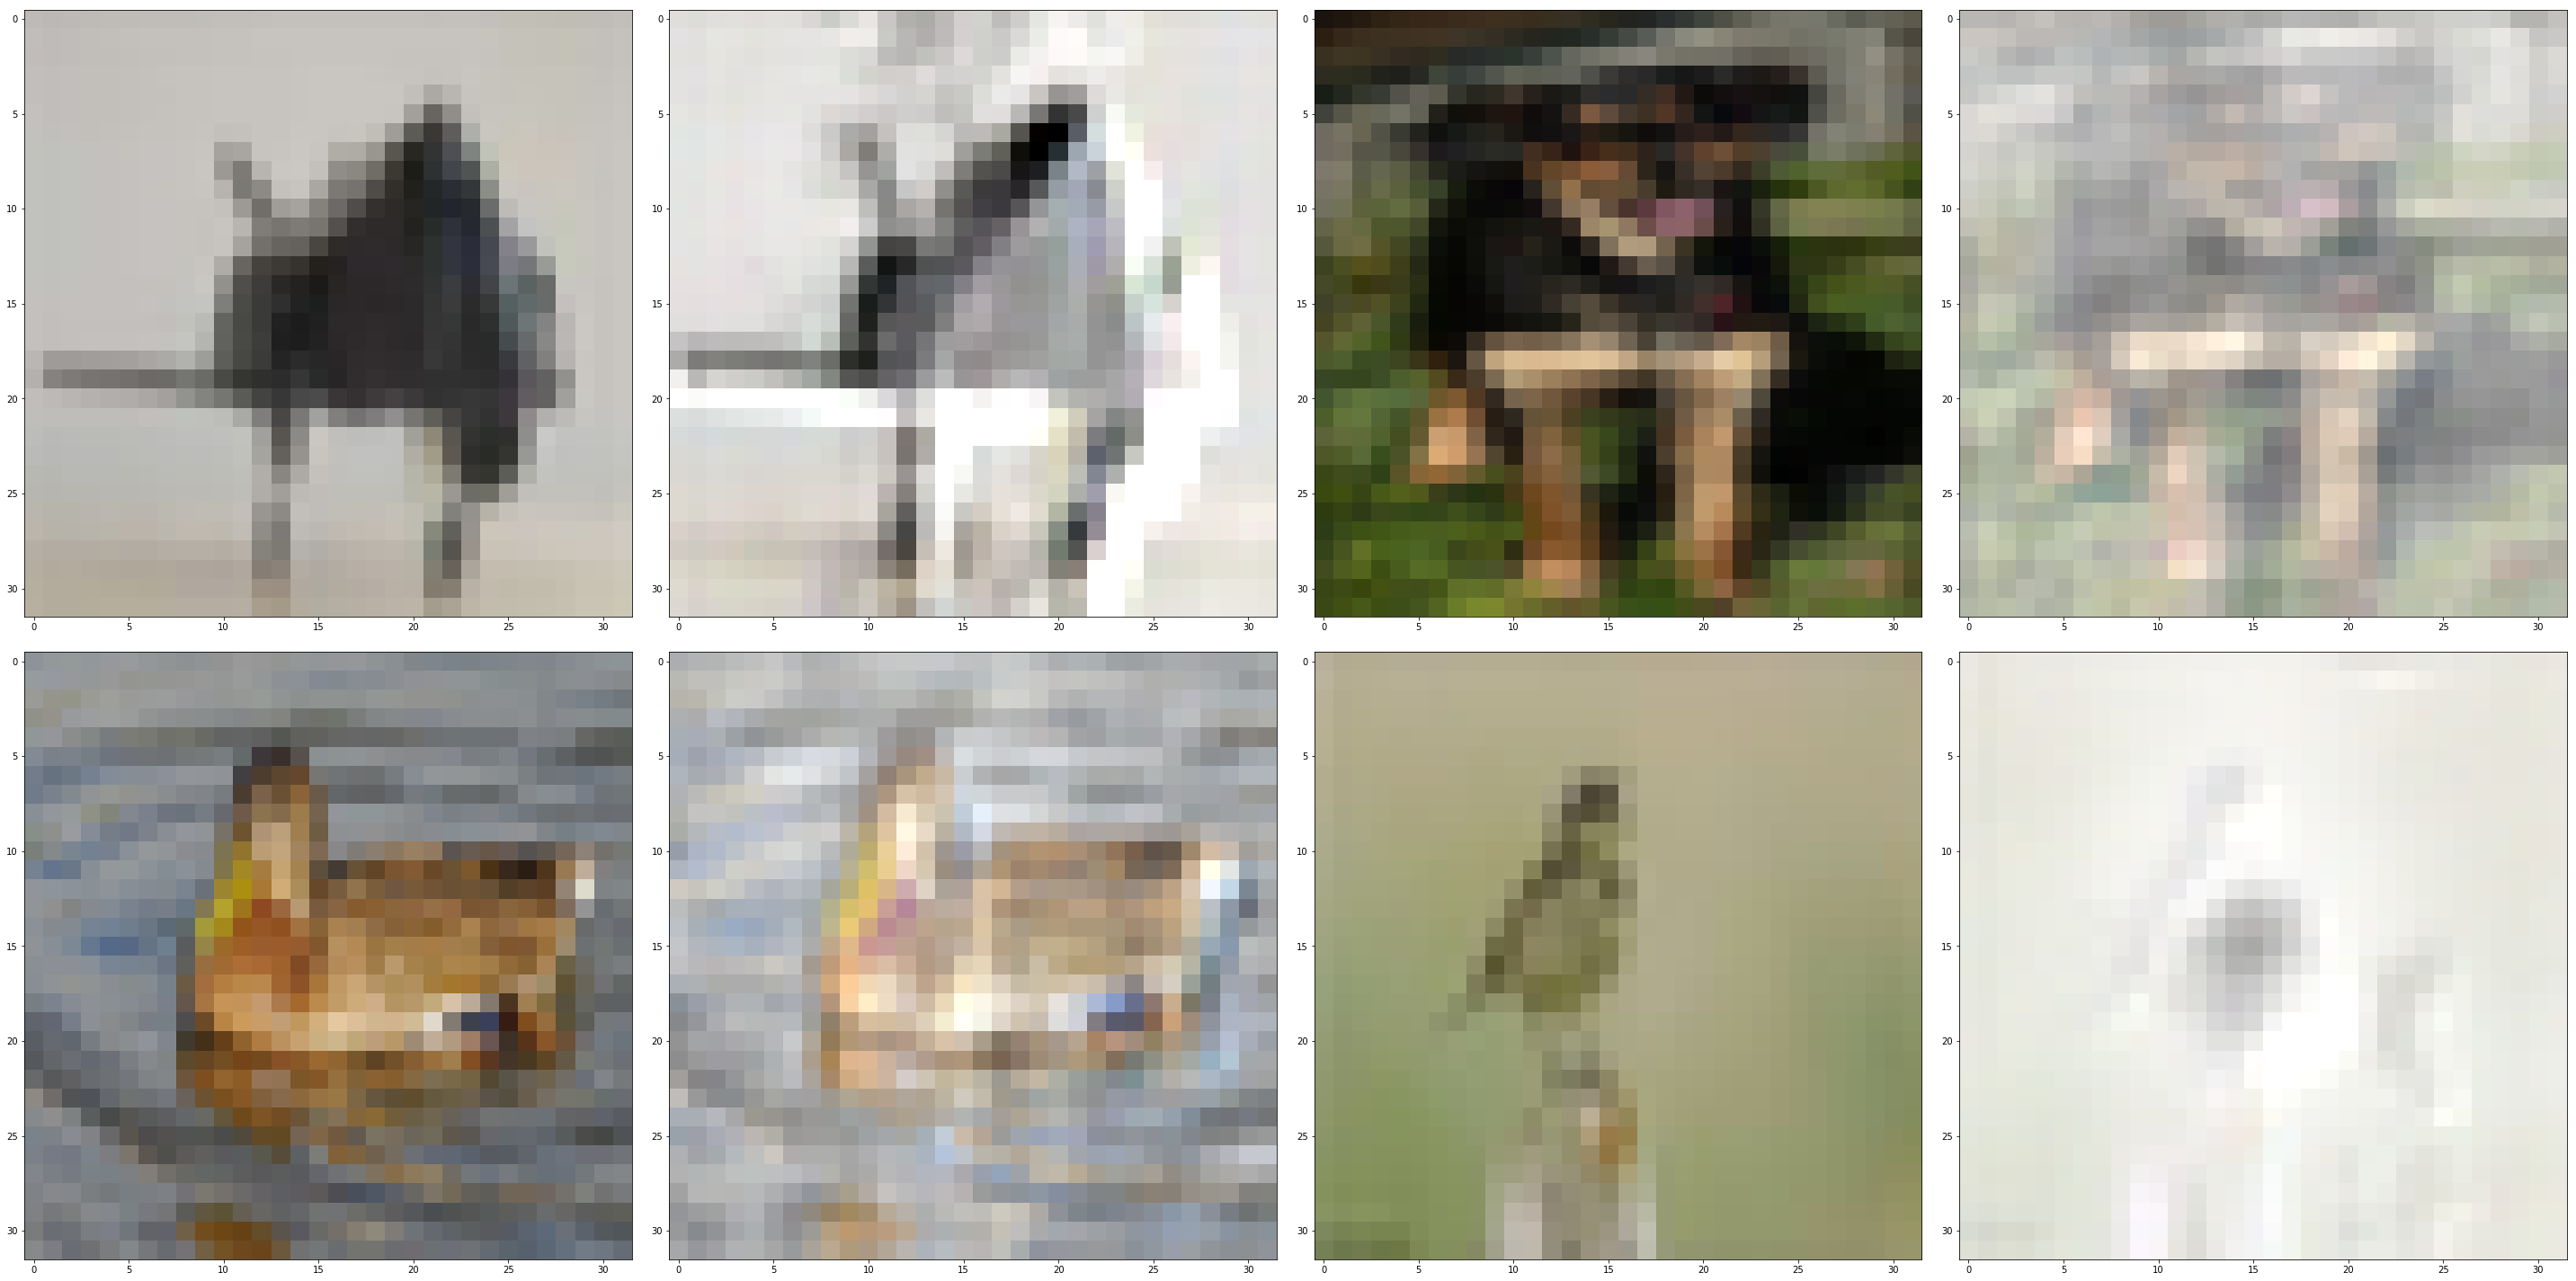

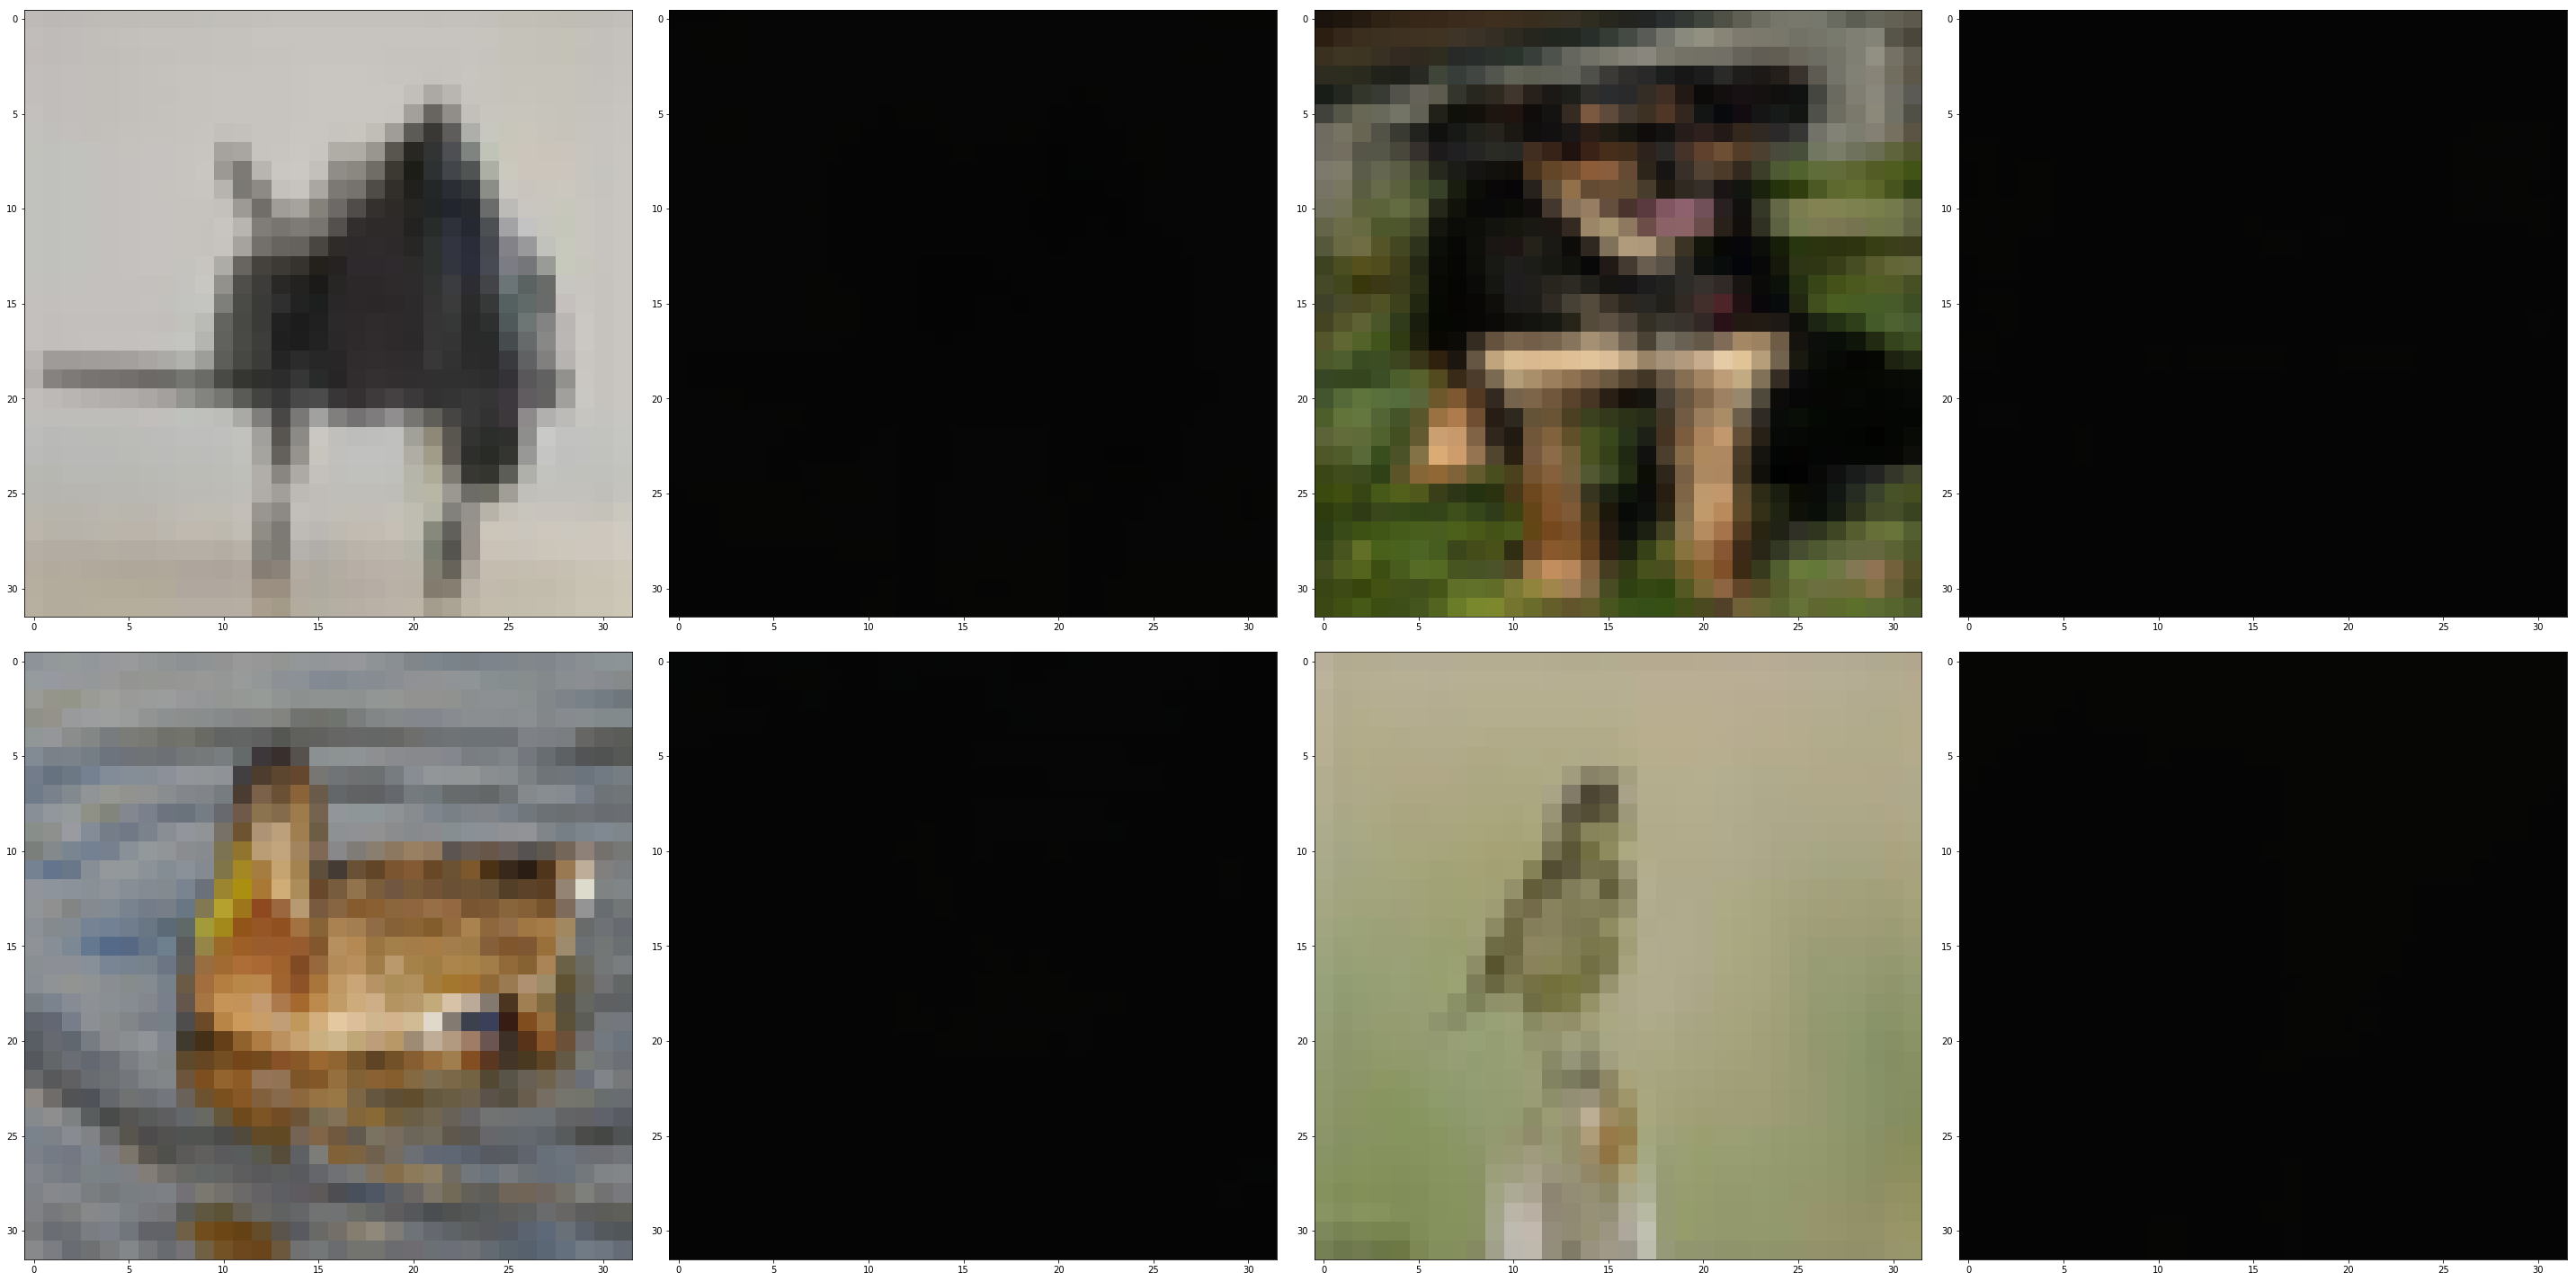

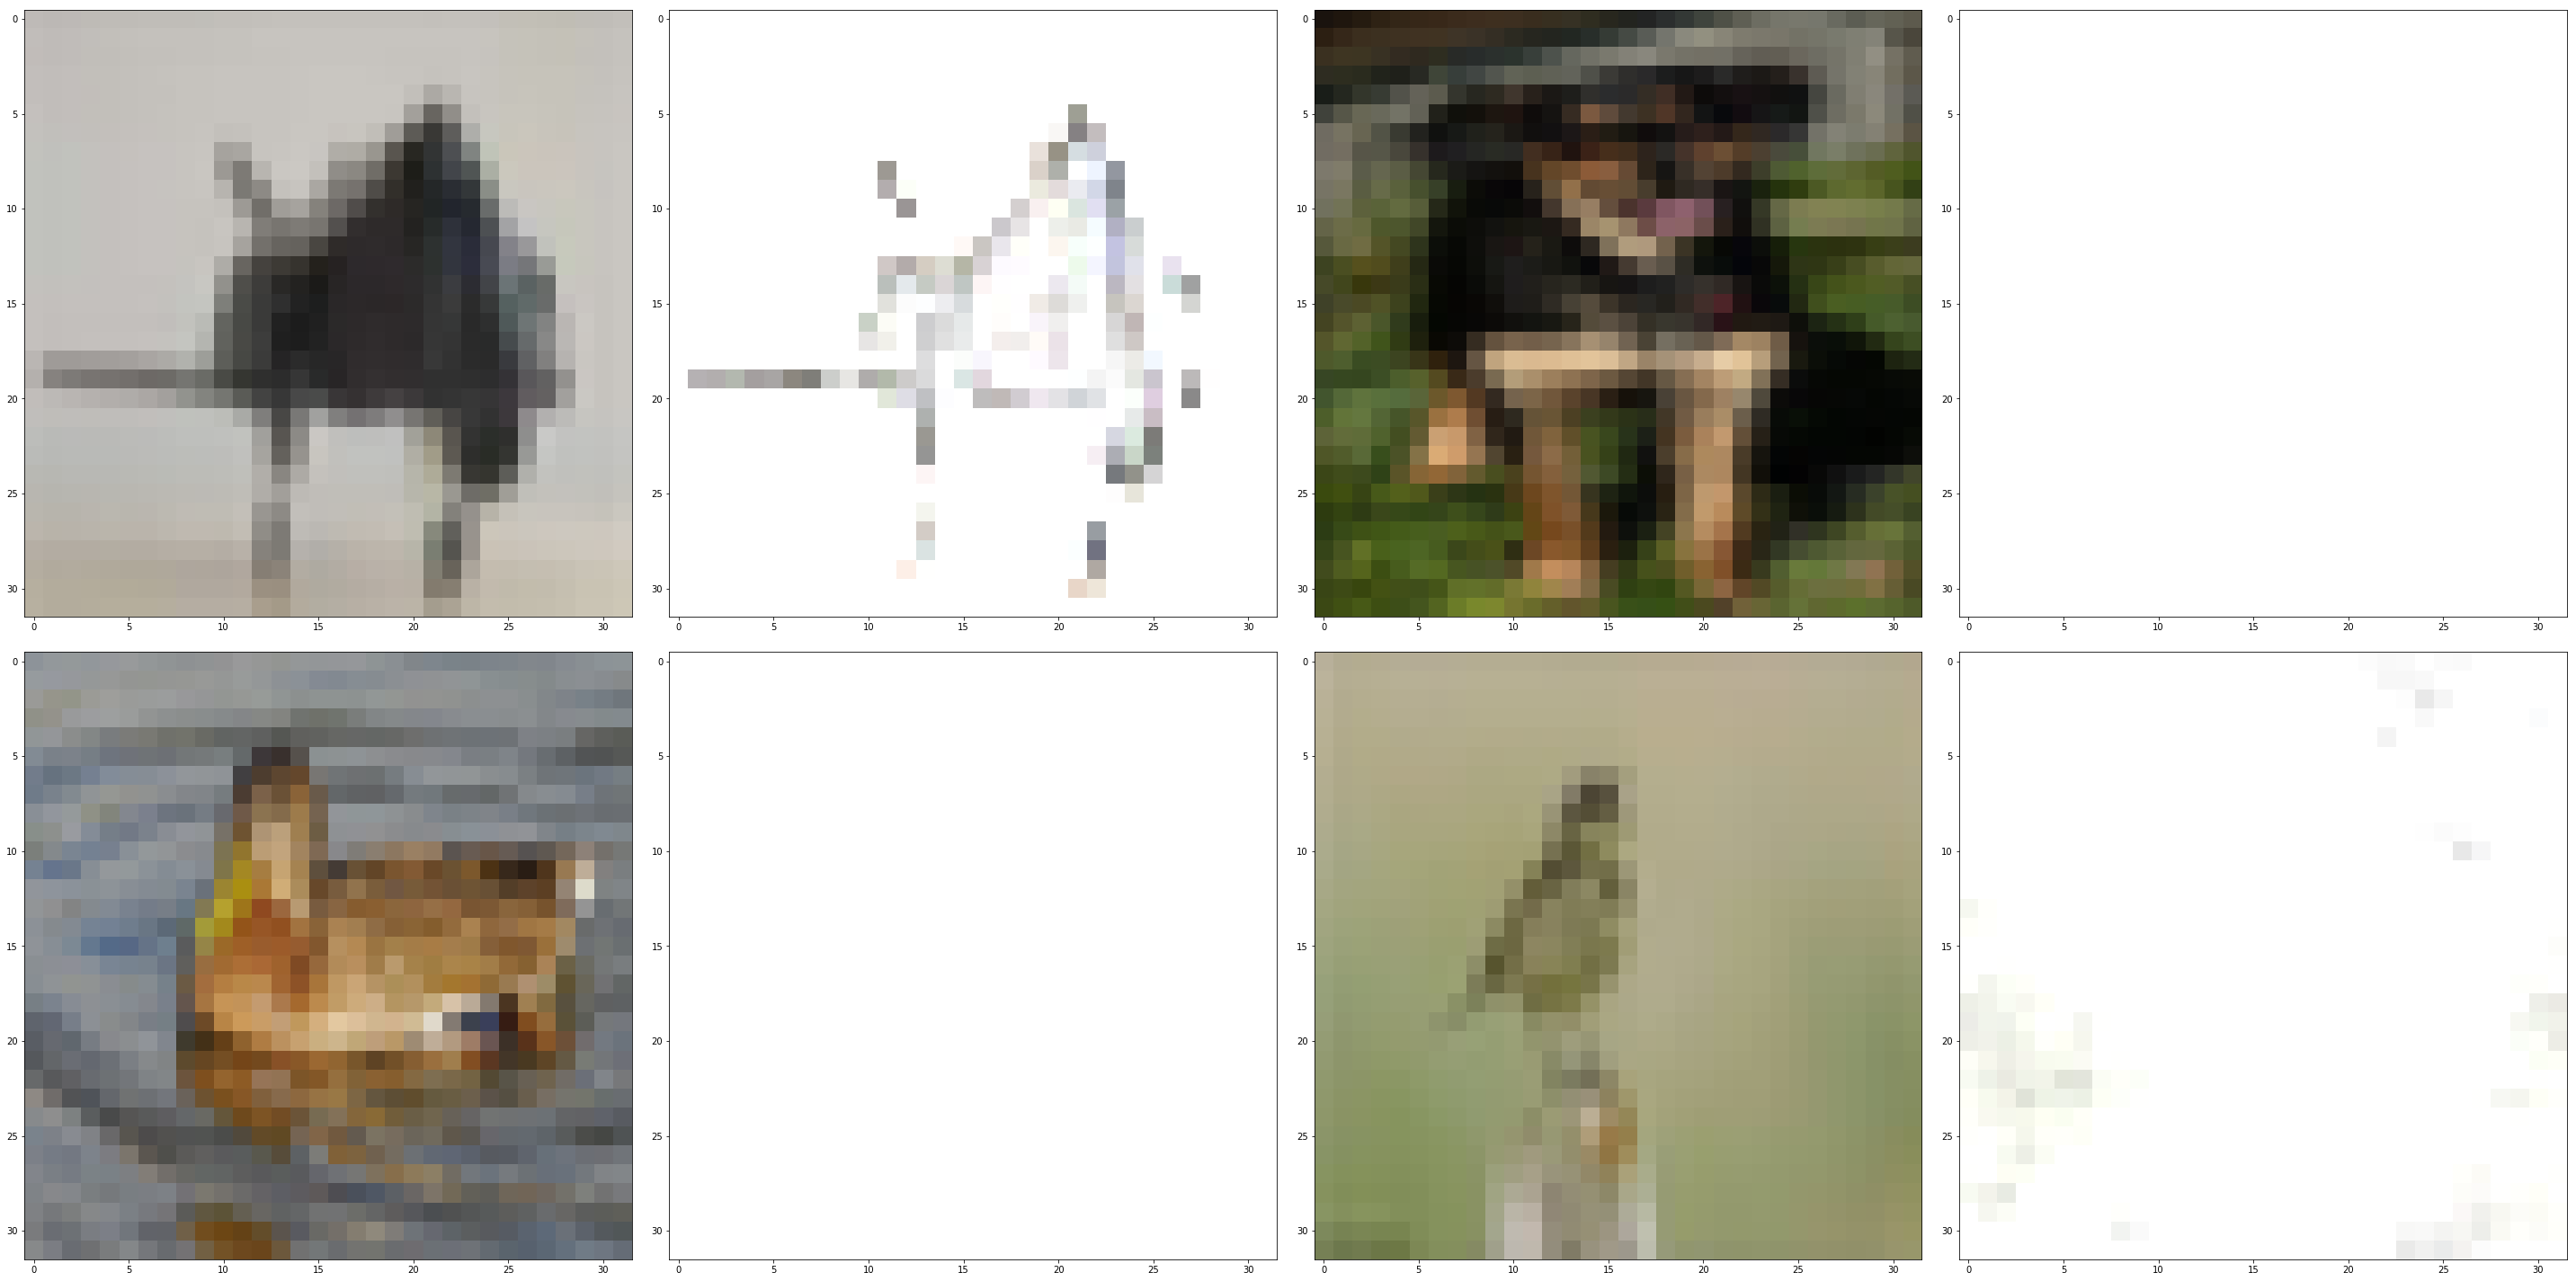

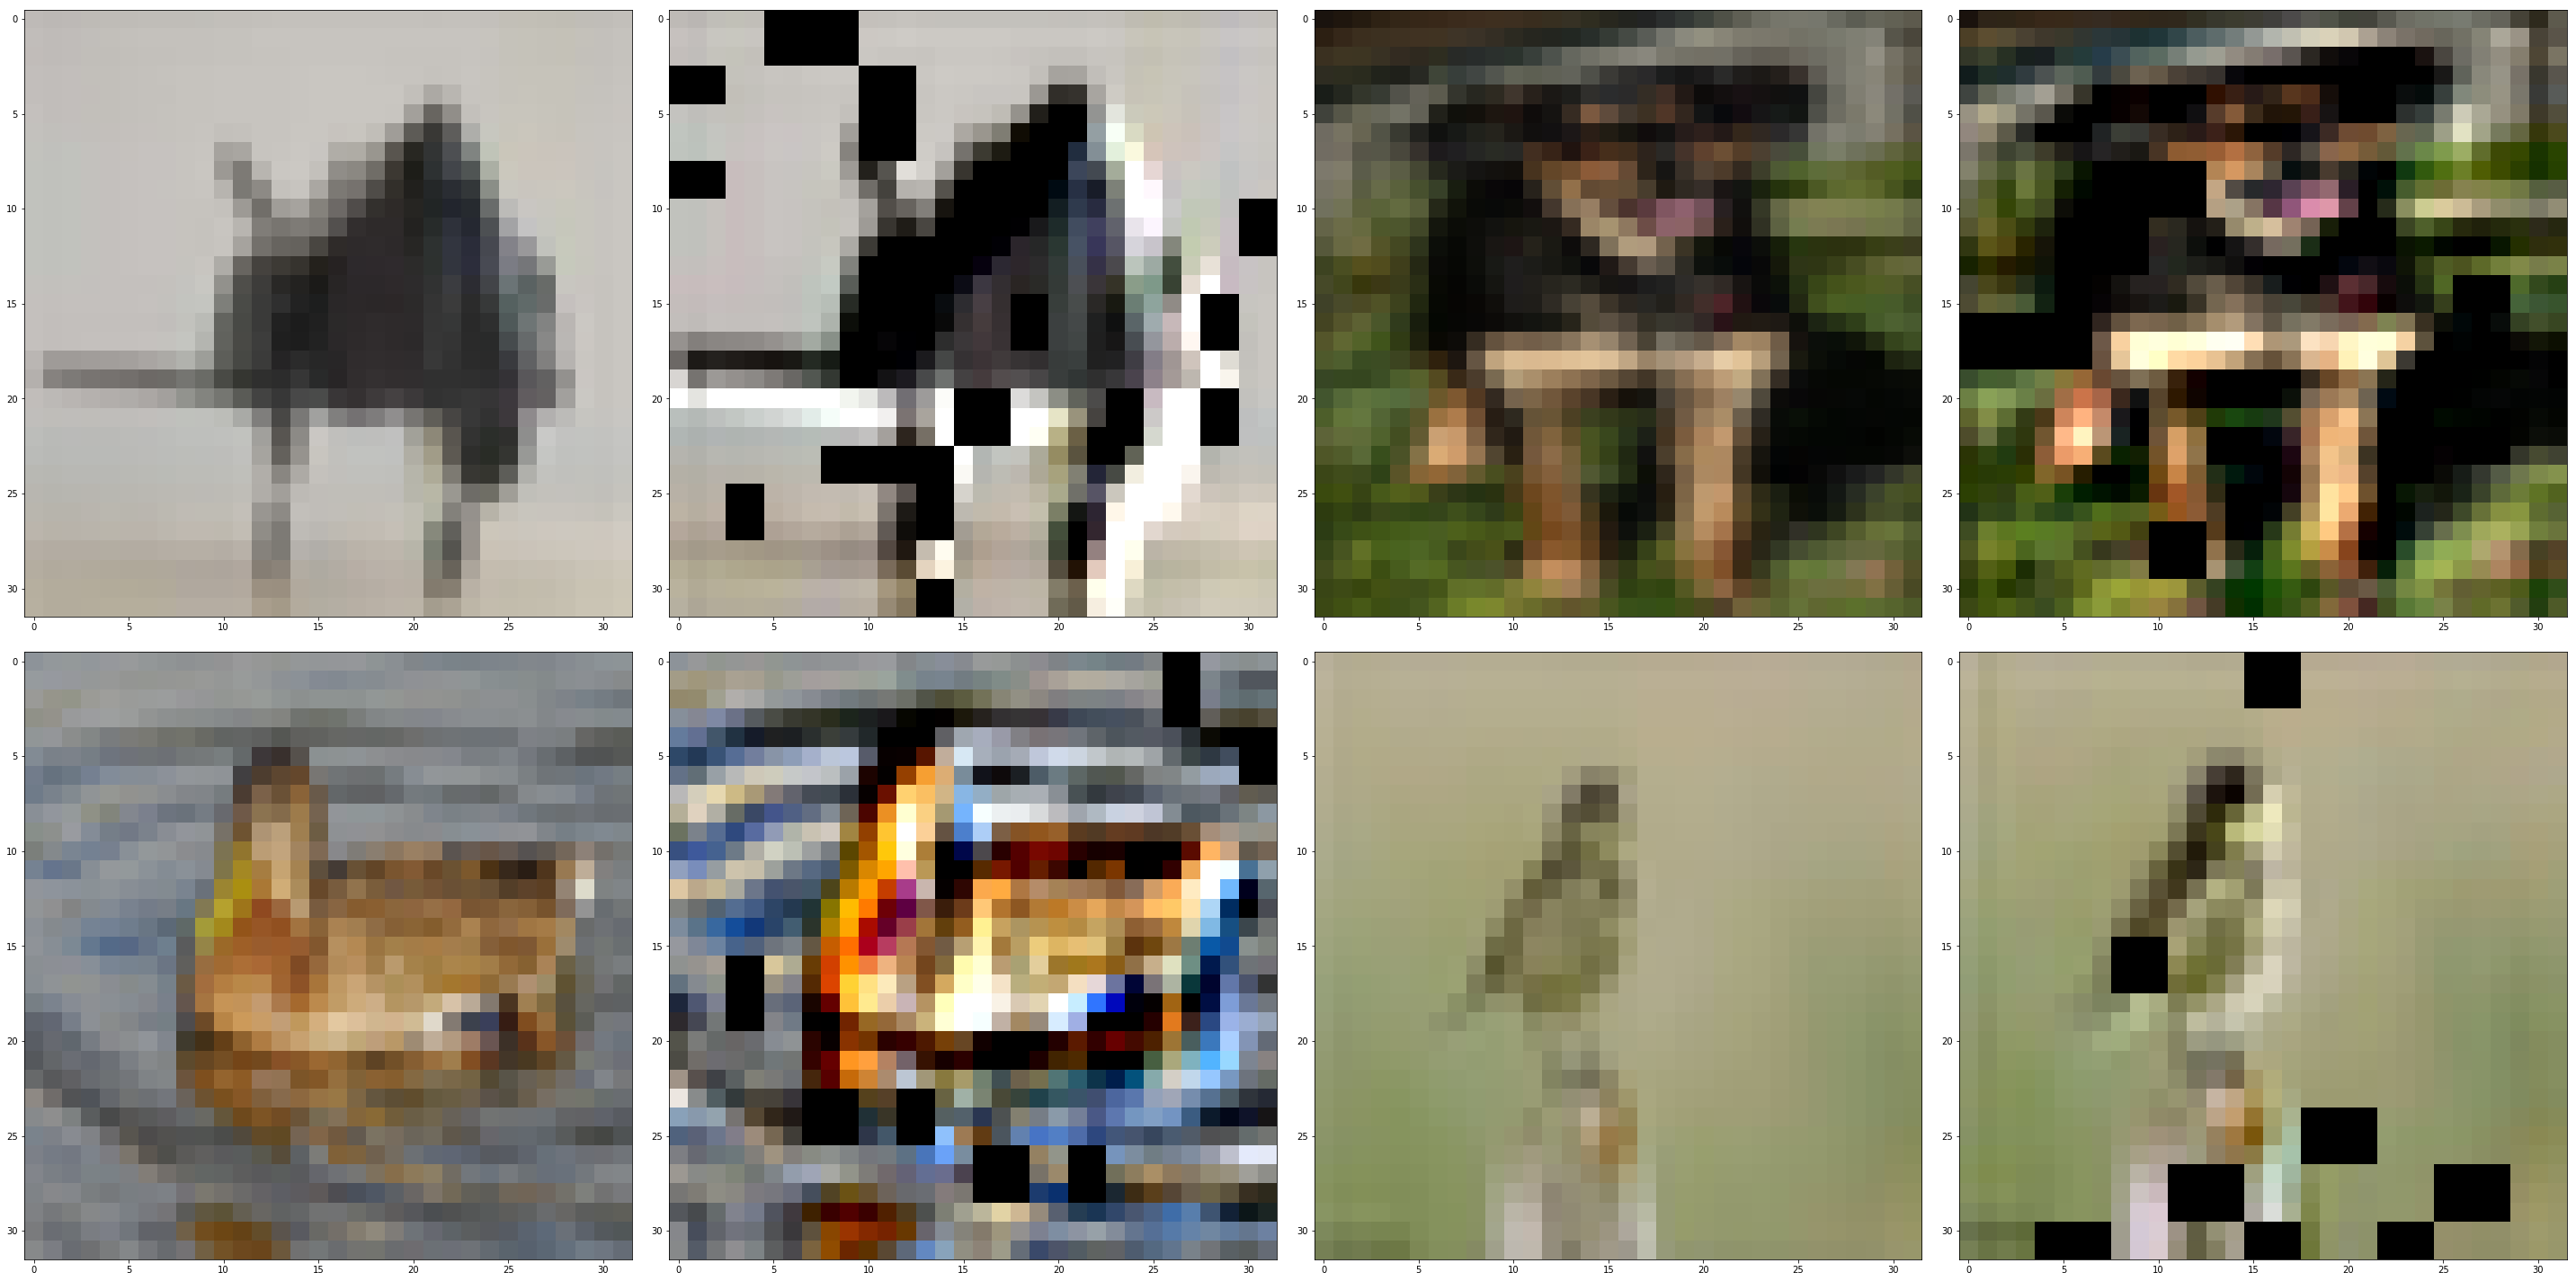

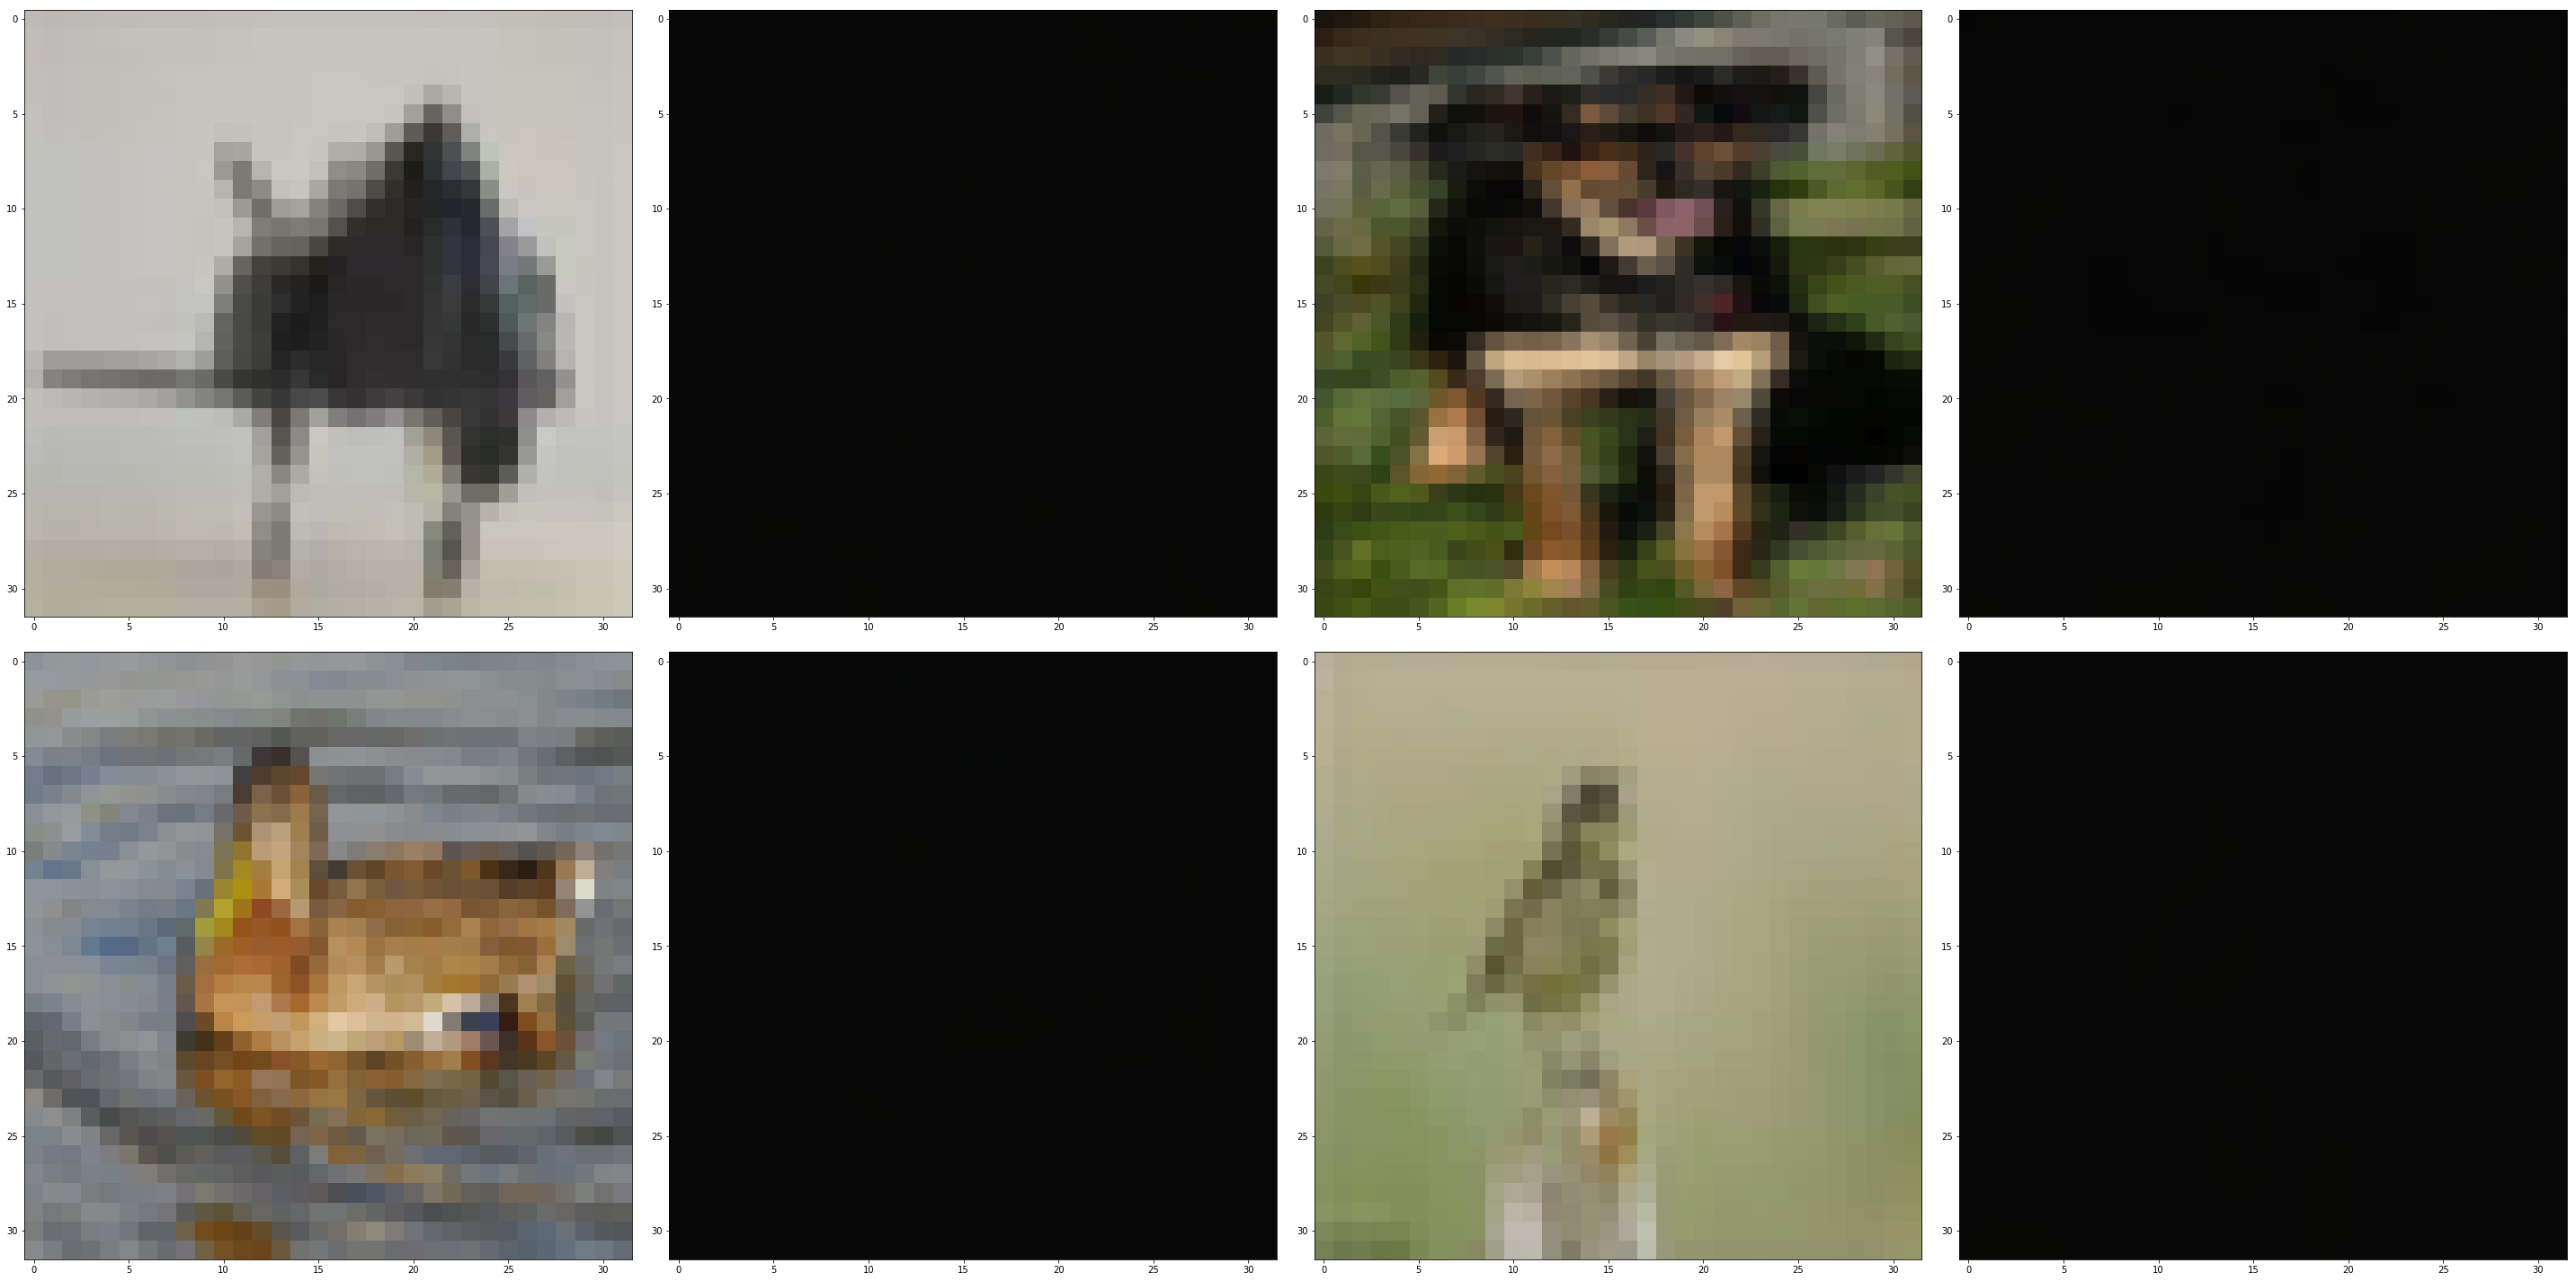

In [41]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [42]:
acc_overfit_by_trial = exp_df[exp_df["epoch"]<20].groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 126


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

['emboss', 0.9570000000000001, 'gamma-contrast', 0.78, 'translate-x', 0.508, 1.0]
trial_no: 302


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['invert', 0.642, 'invert', 0.9740000000000001, 'emboss', 0.138, 1.0]
trial_no: 414


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

['invert', 0.6579999999999999, 'gamma-contrast', 0.653, 'translate-y', 0.03, 1.0]
trial_no: 6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['rotate', 0.222, 'sharpen', 0.903, 'emboss', 0.613, 1.0]
trial_no: 66


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['emboss', 0.278, 'translate-y', 0.794, 'translate-x', 0.616, 1.0]


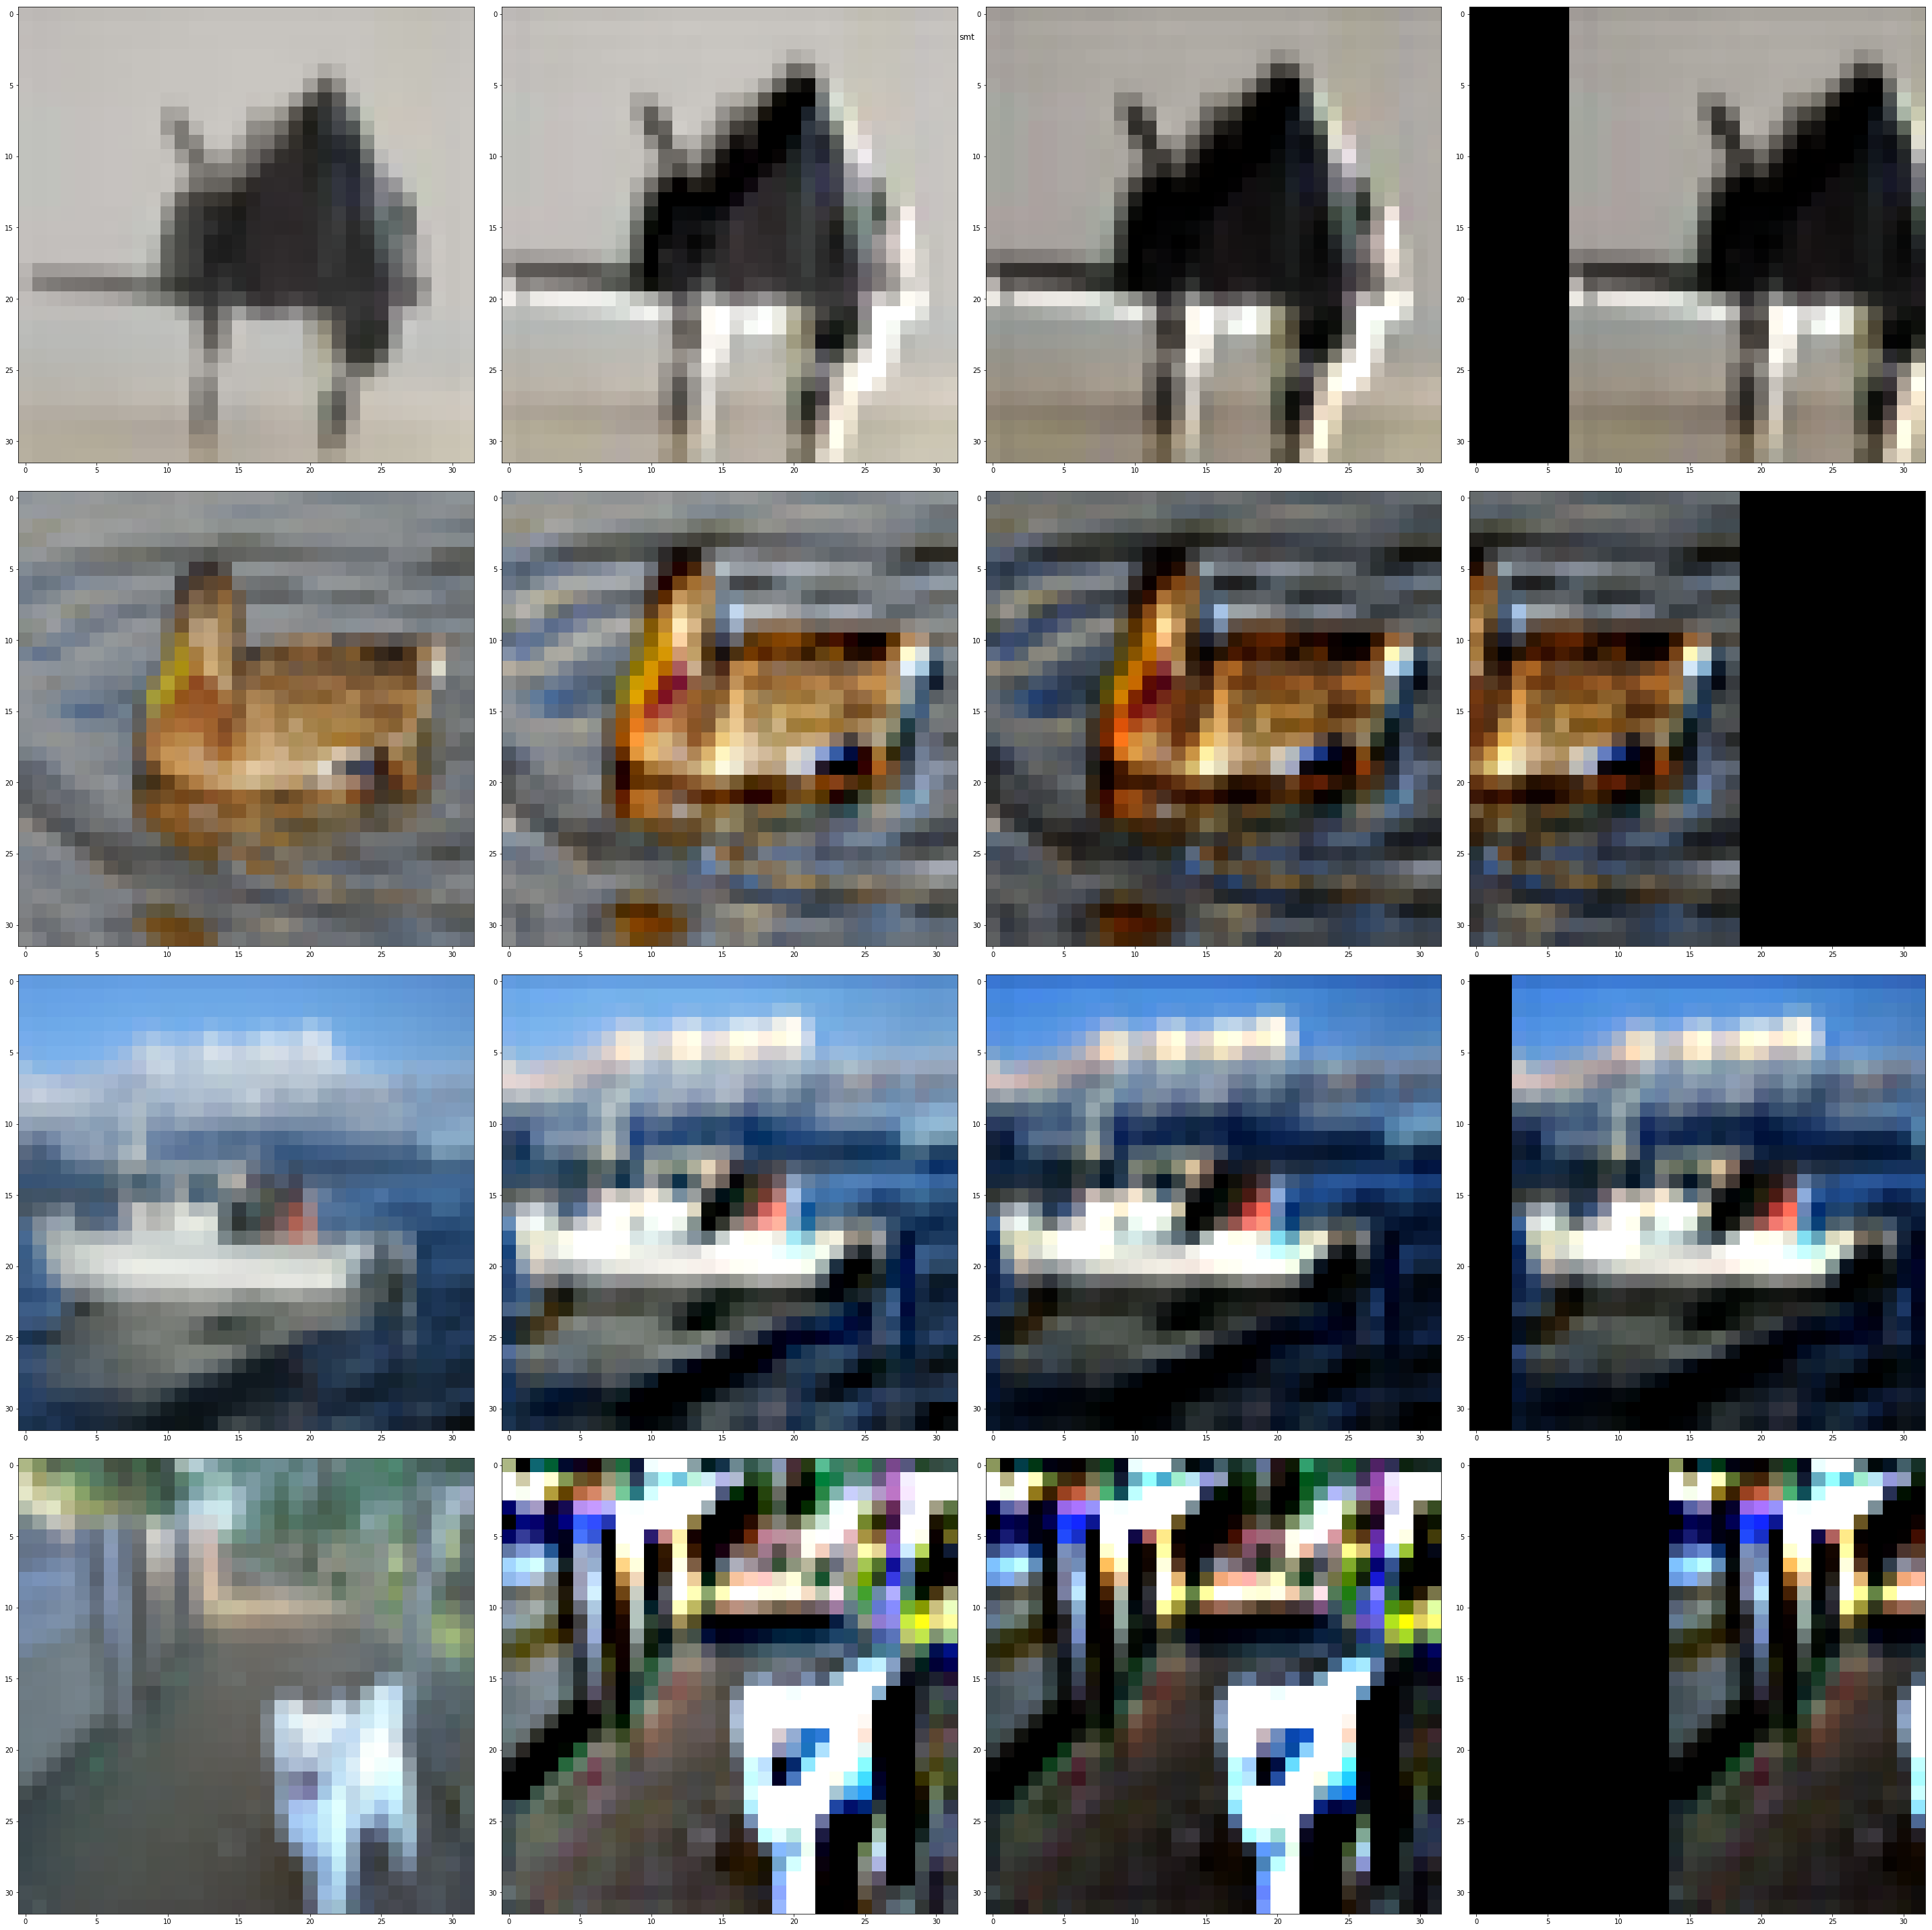

<Figure size 144x144 with 0 Axes>

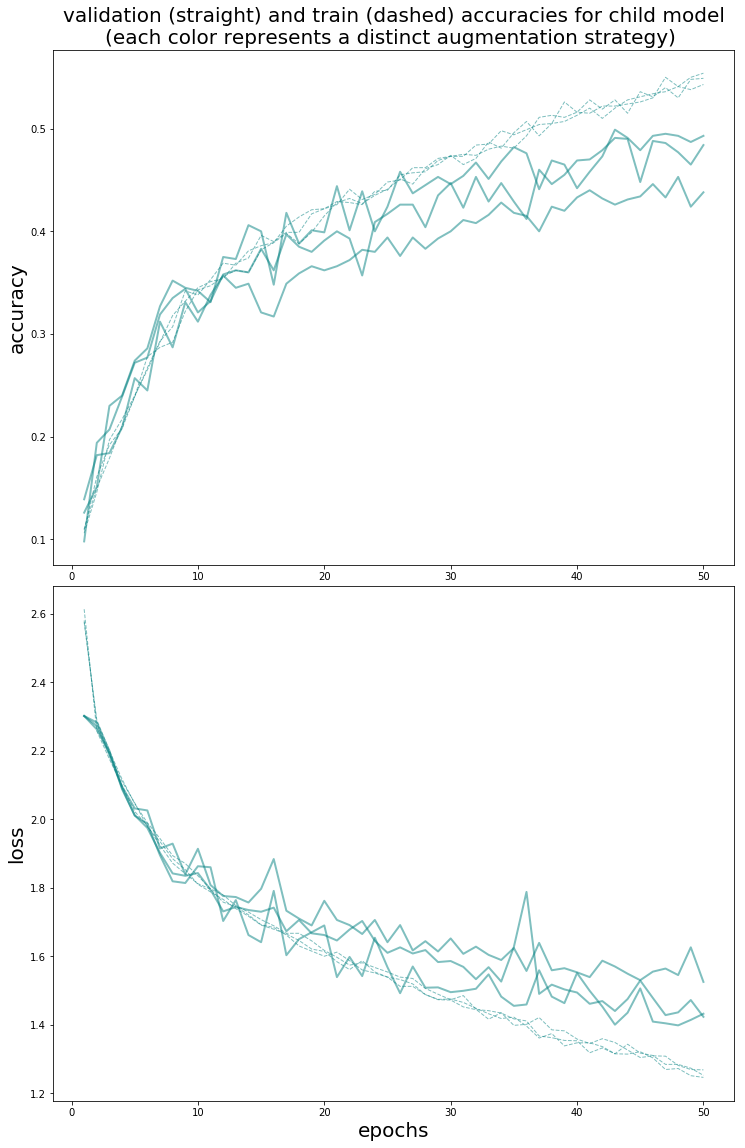

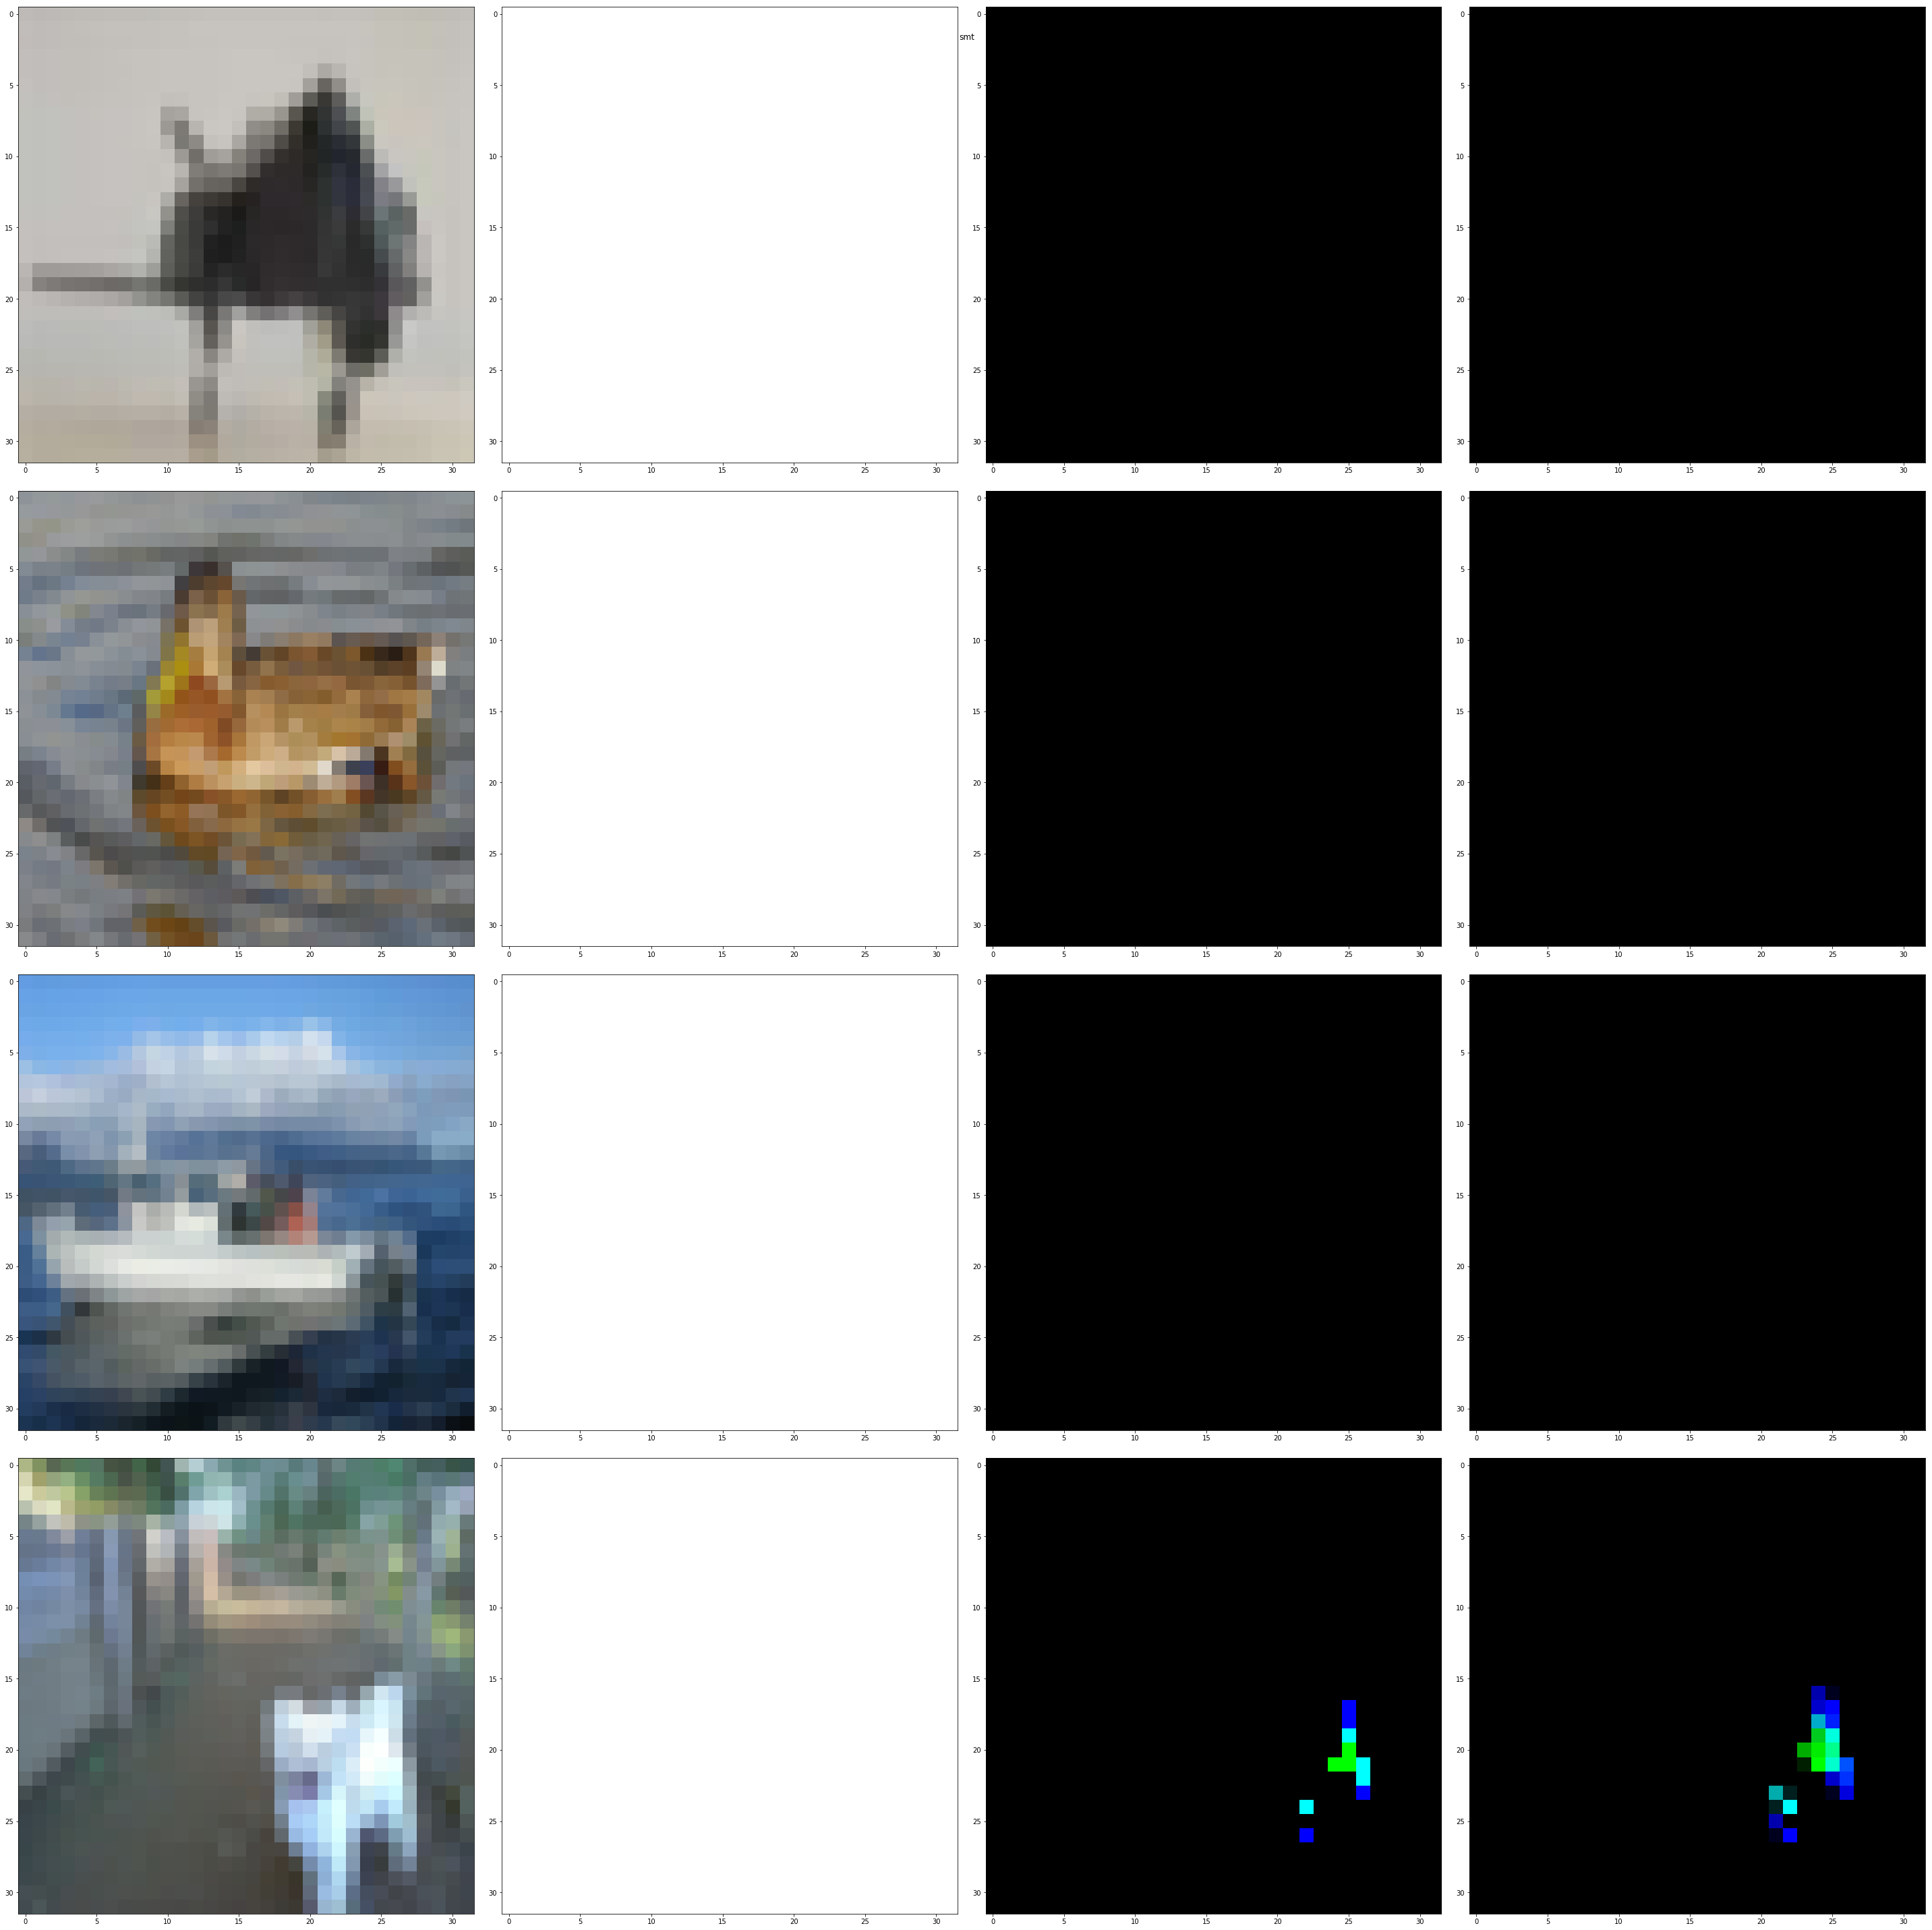

<Figure size 144x144 with 0 Axes>

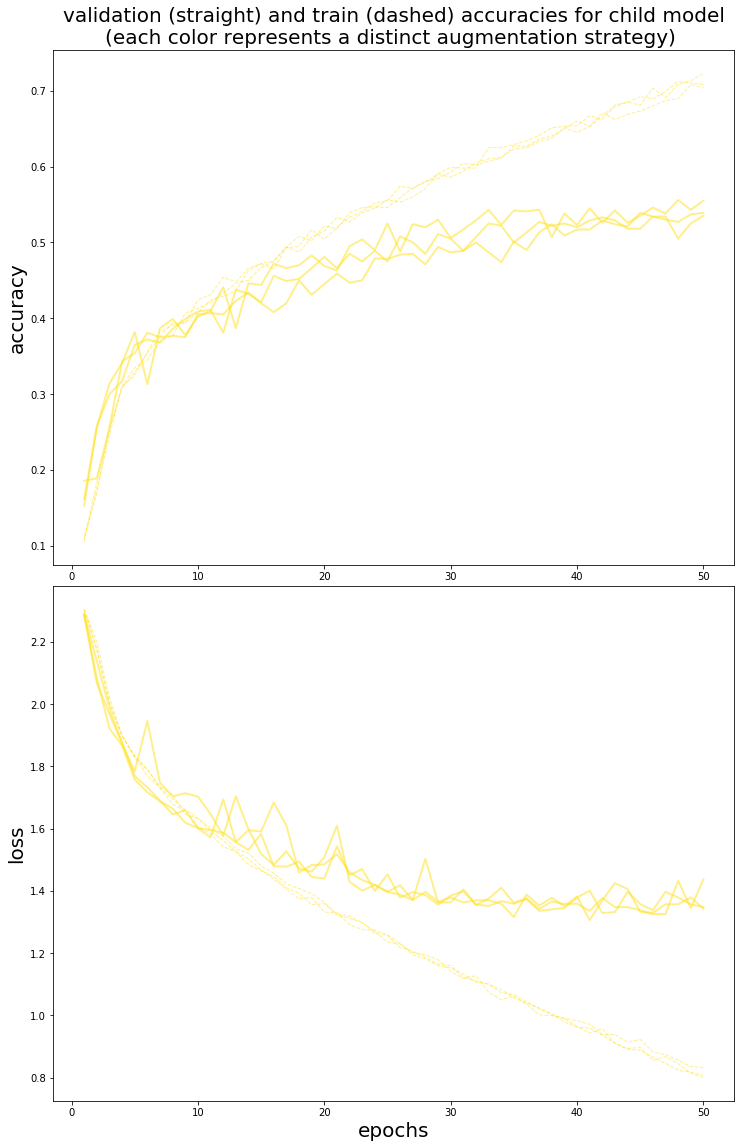

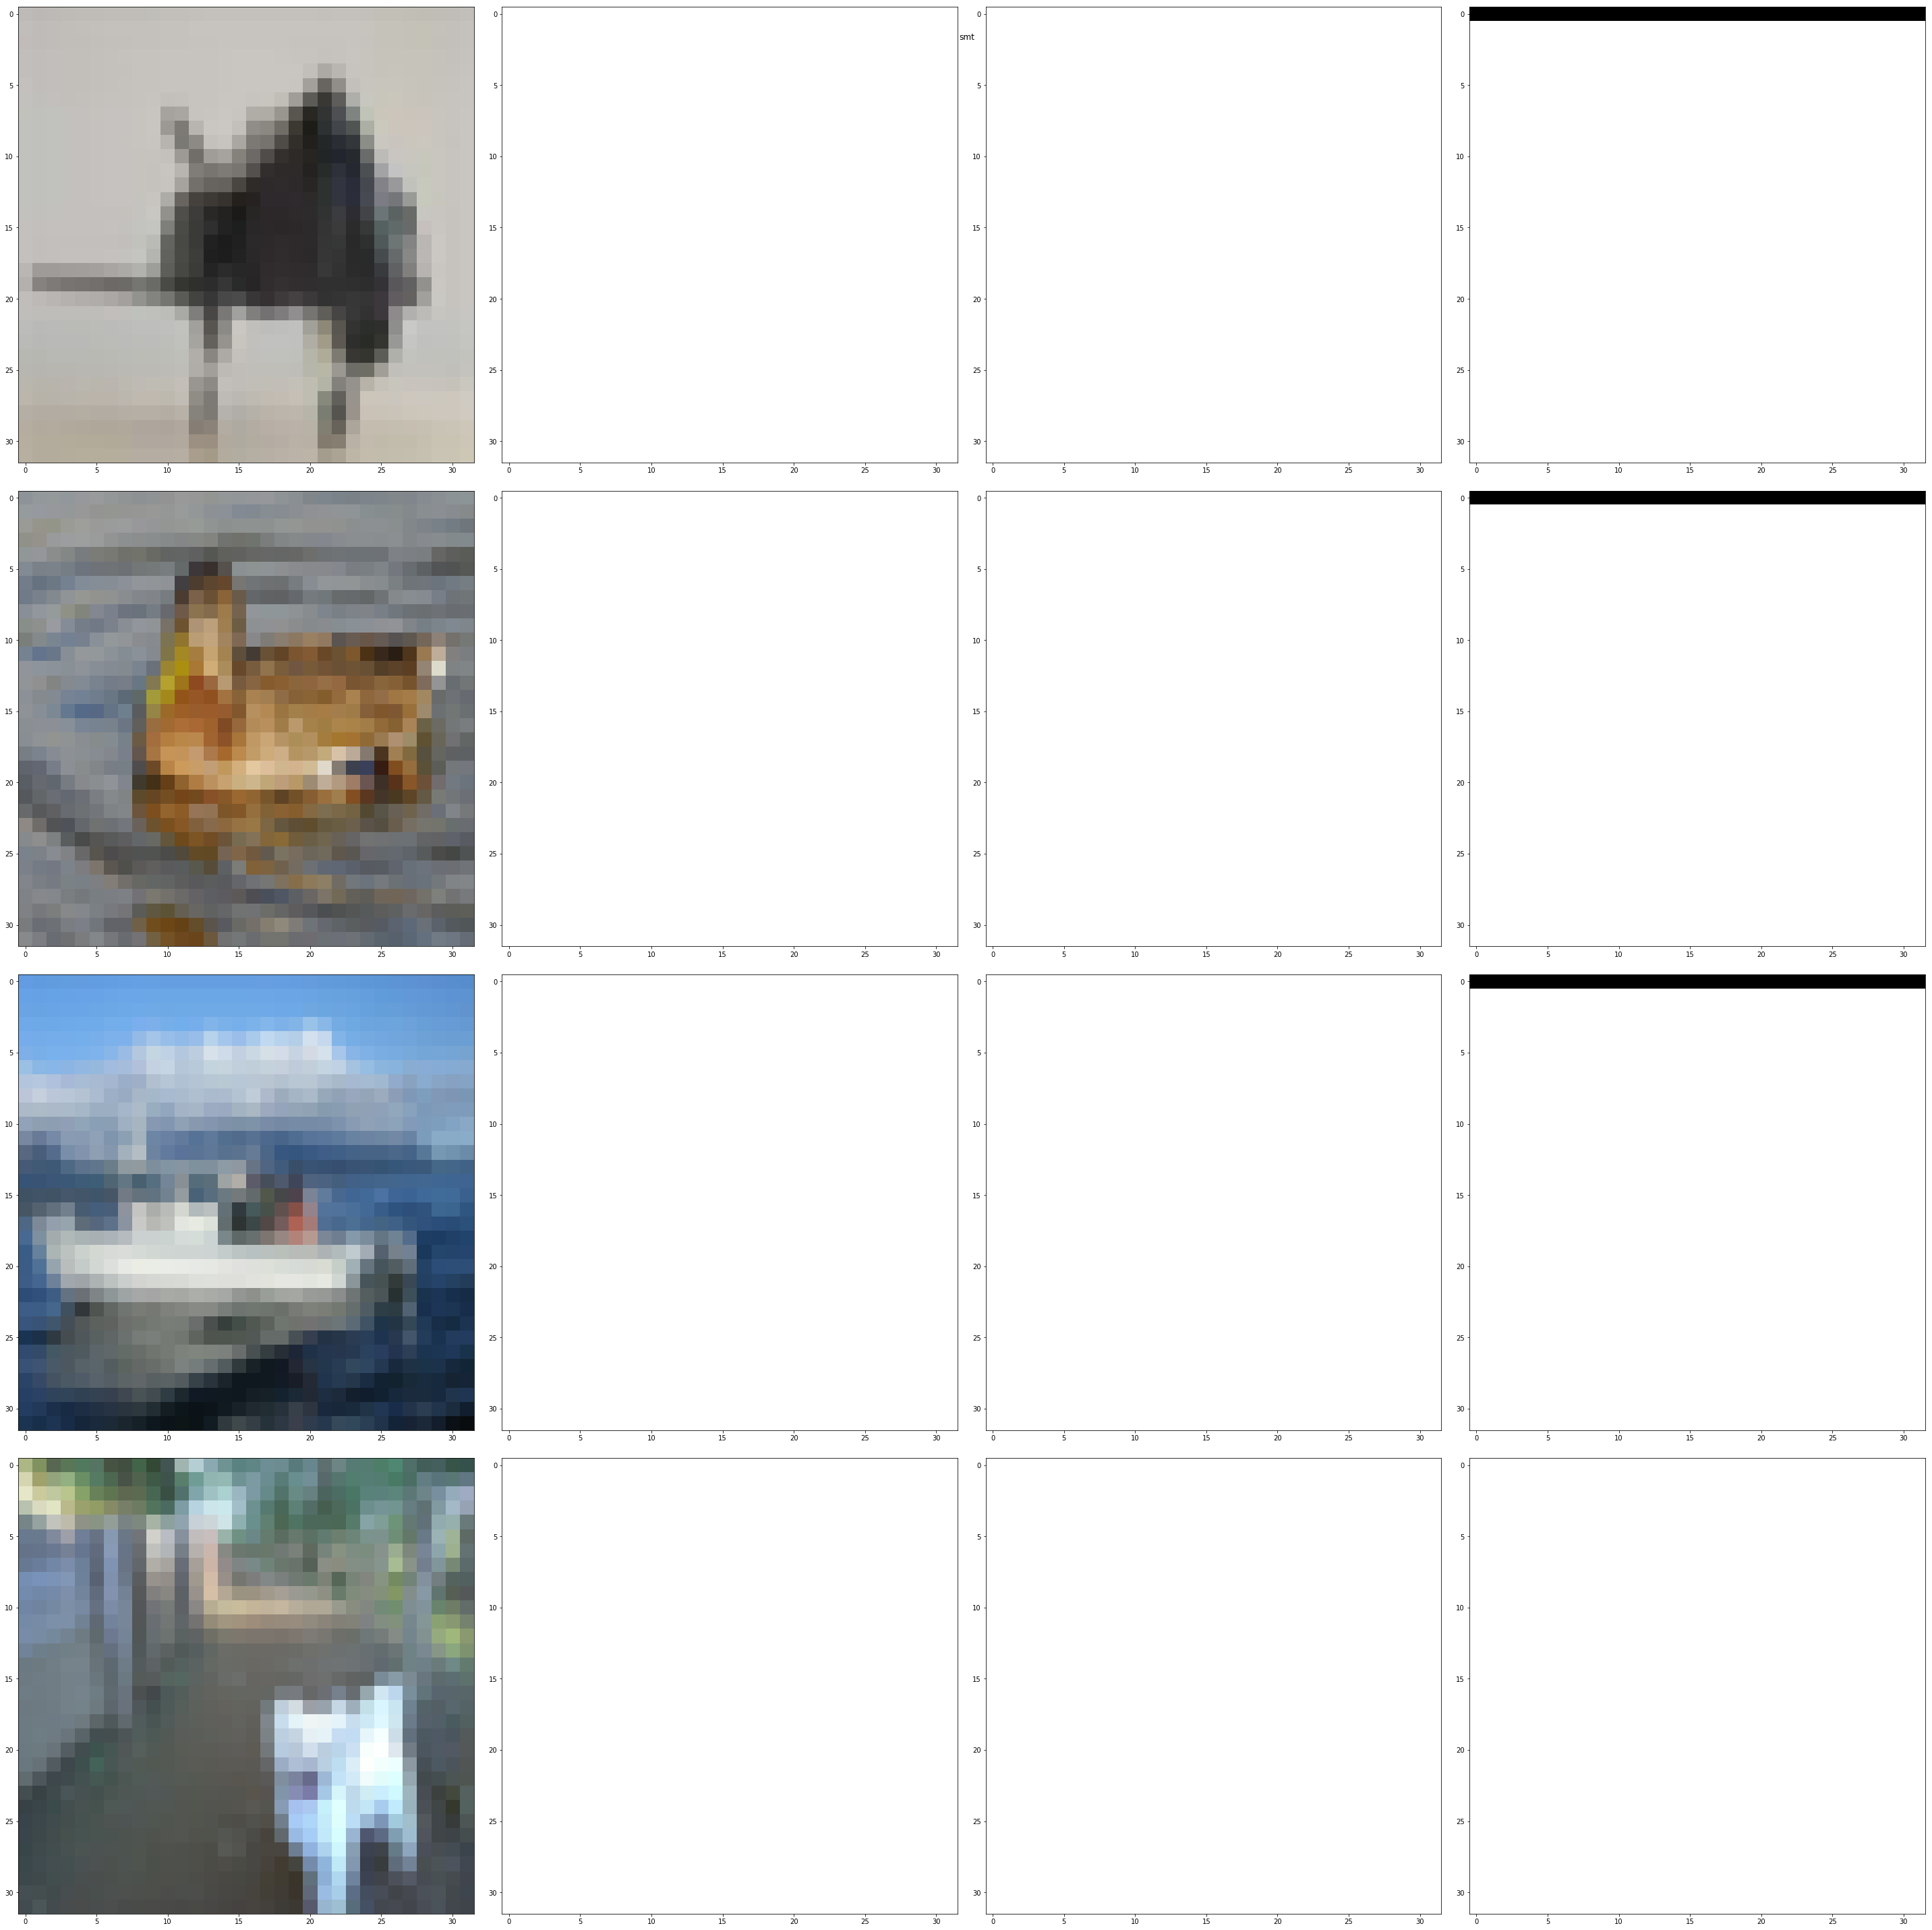

<Figure size 144x144 with 0 Axes>

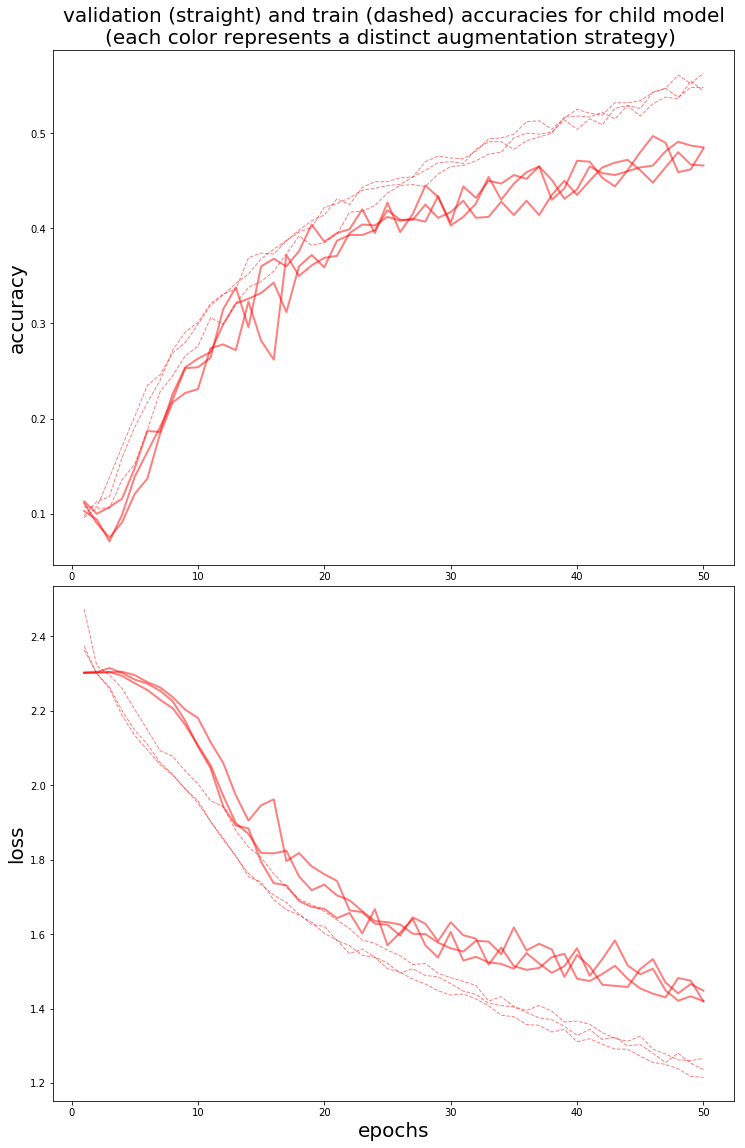

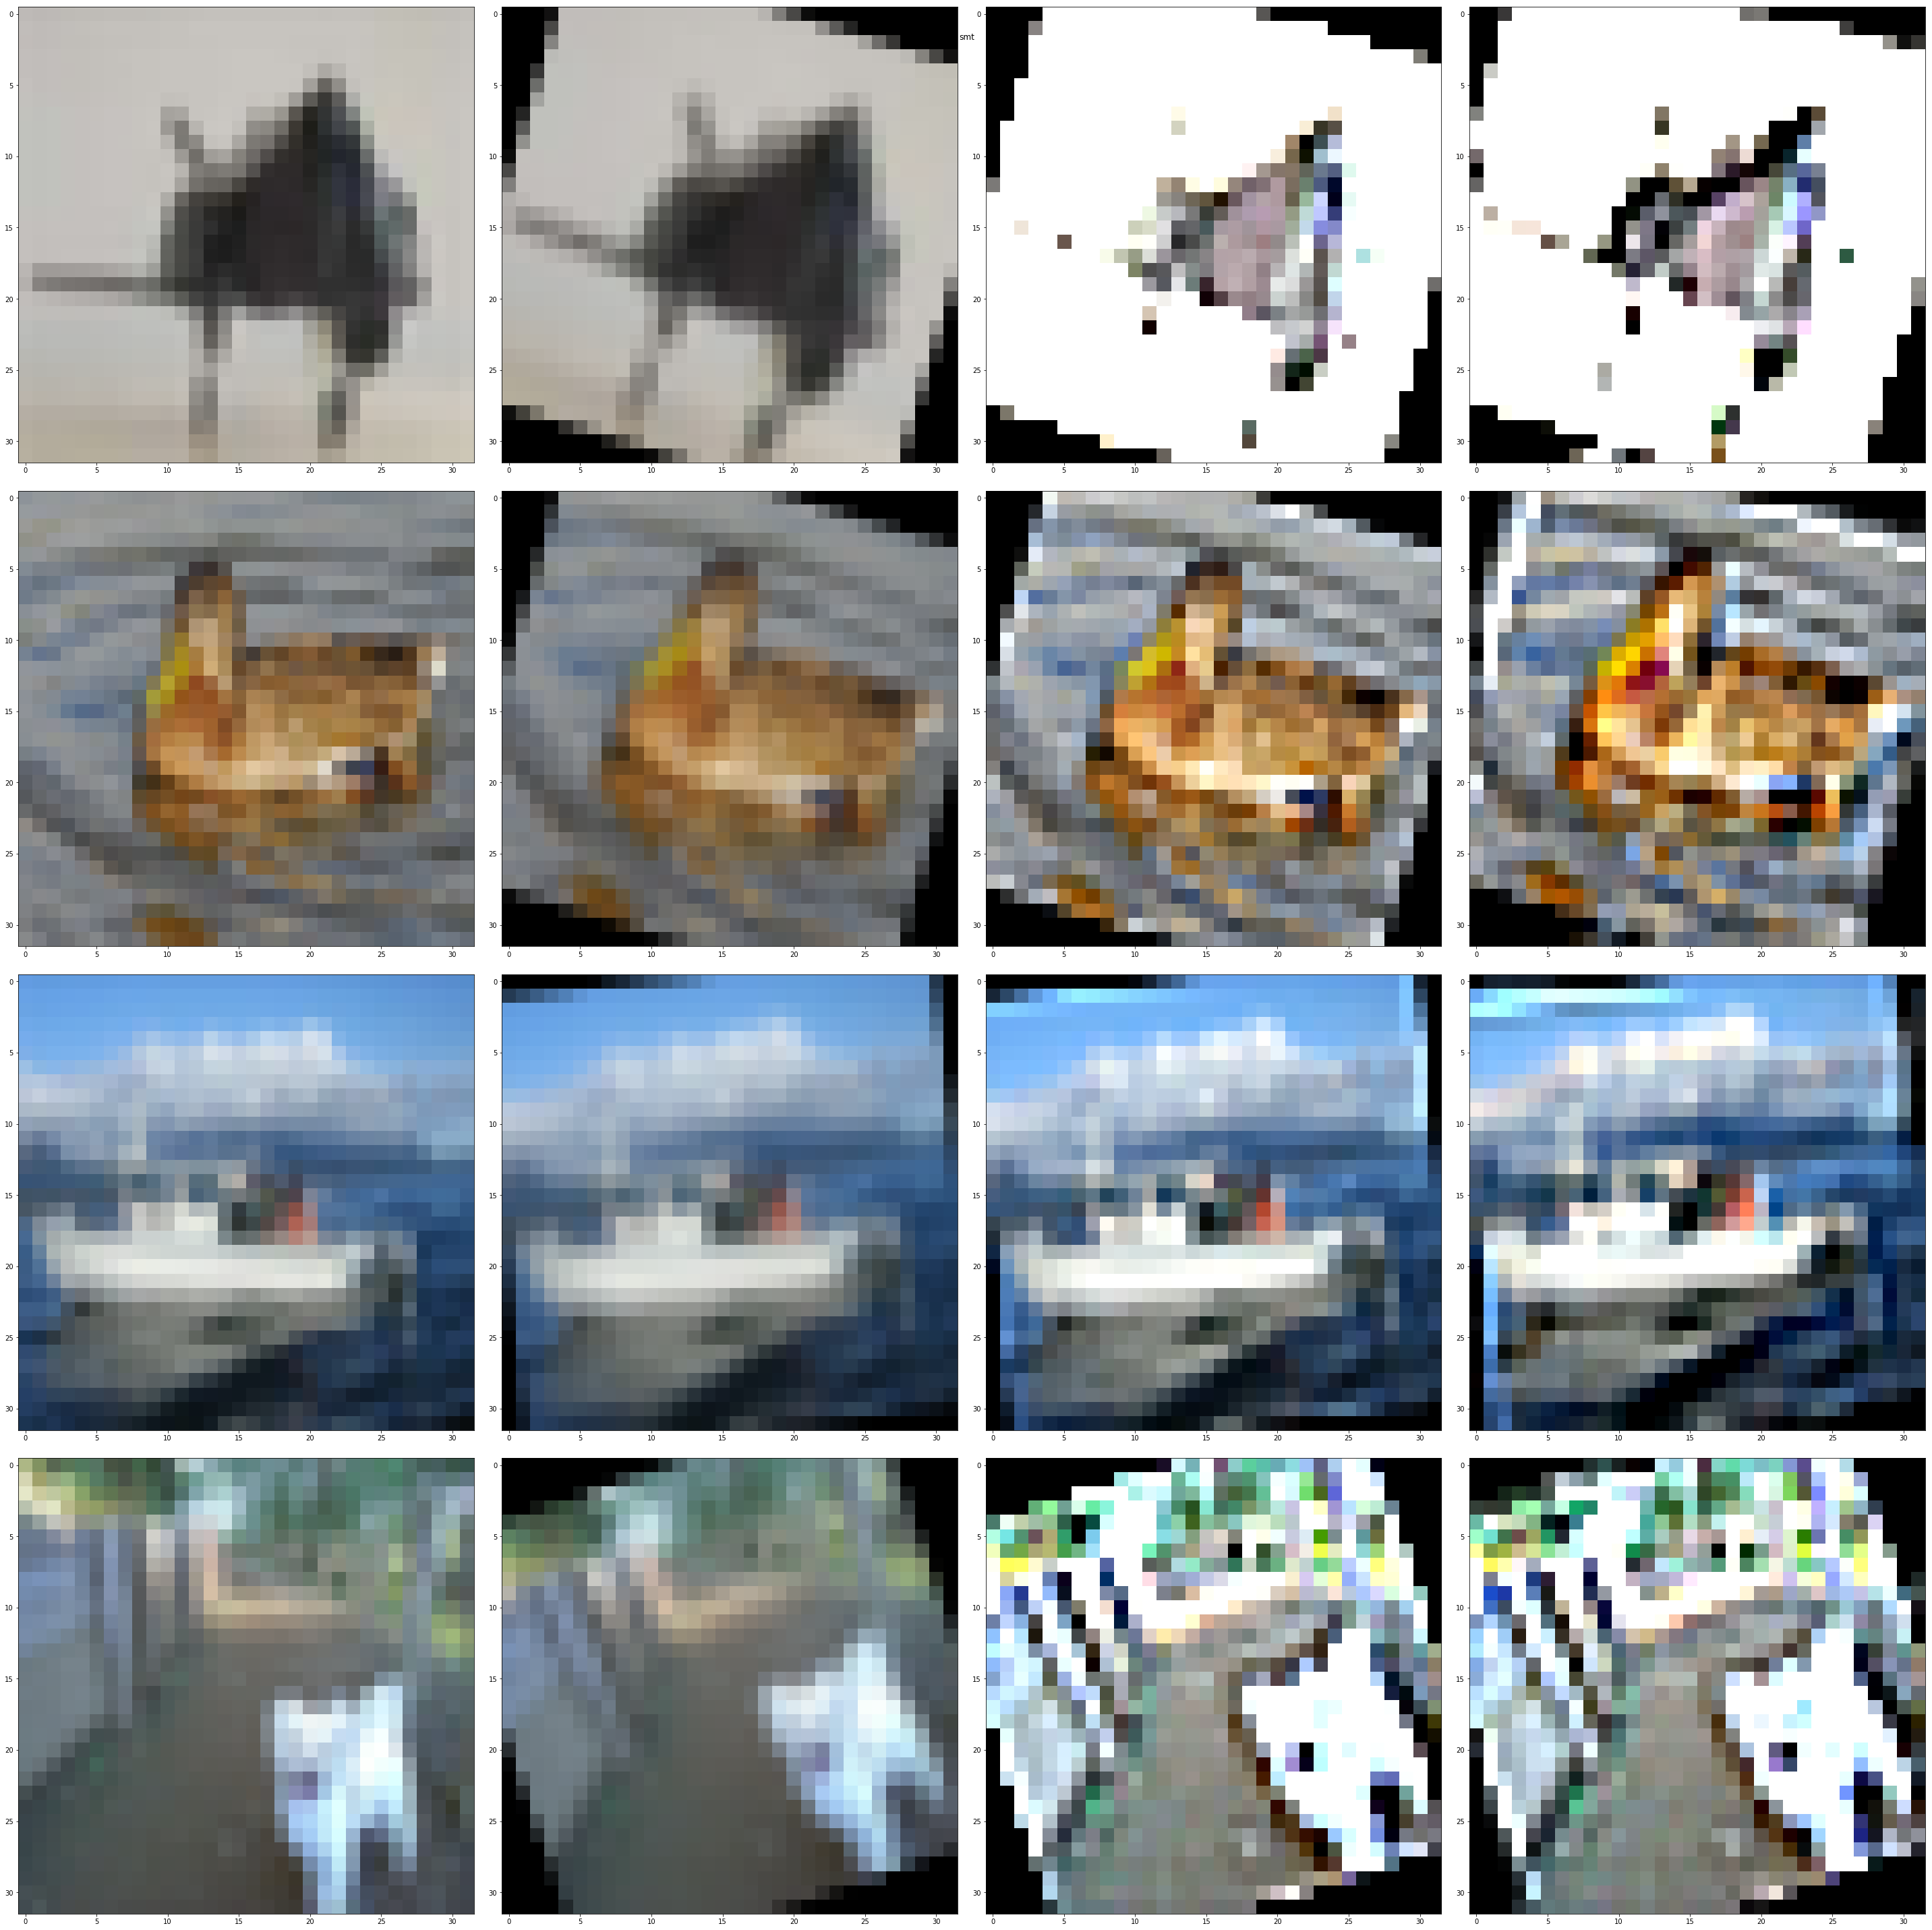

<Figure size 144x144 with 0 Axes>

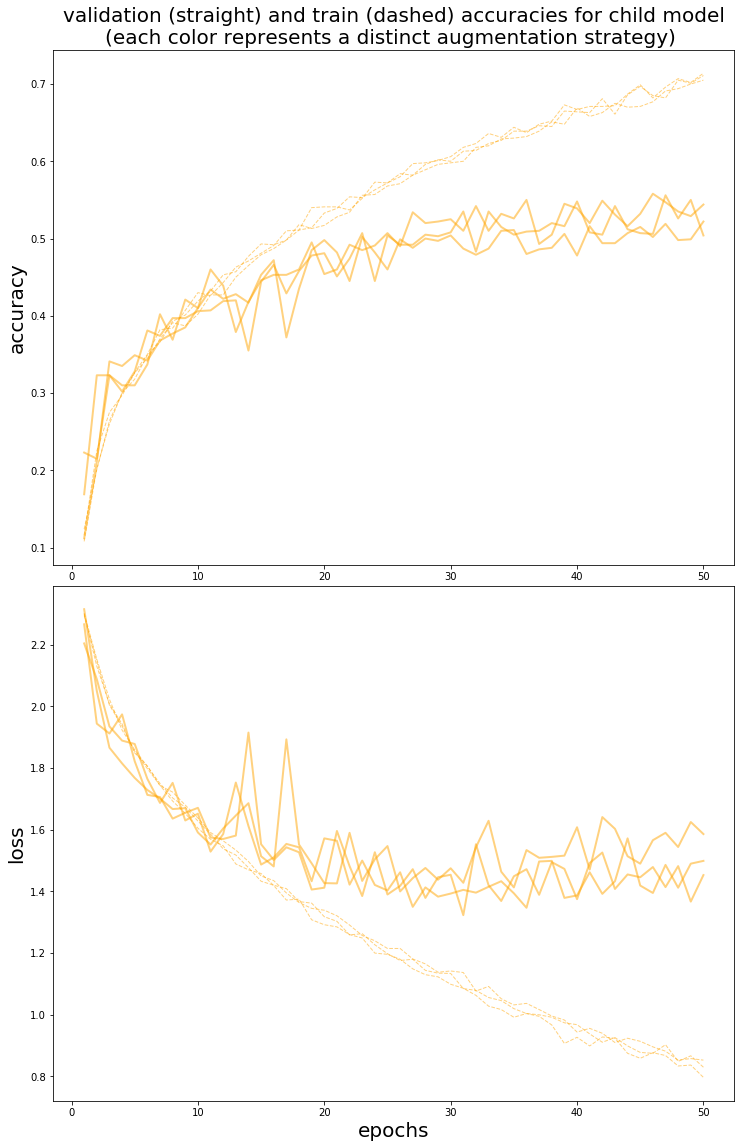

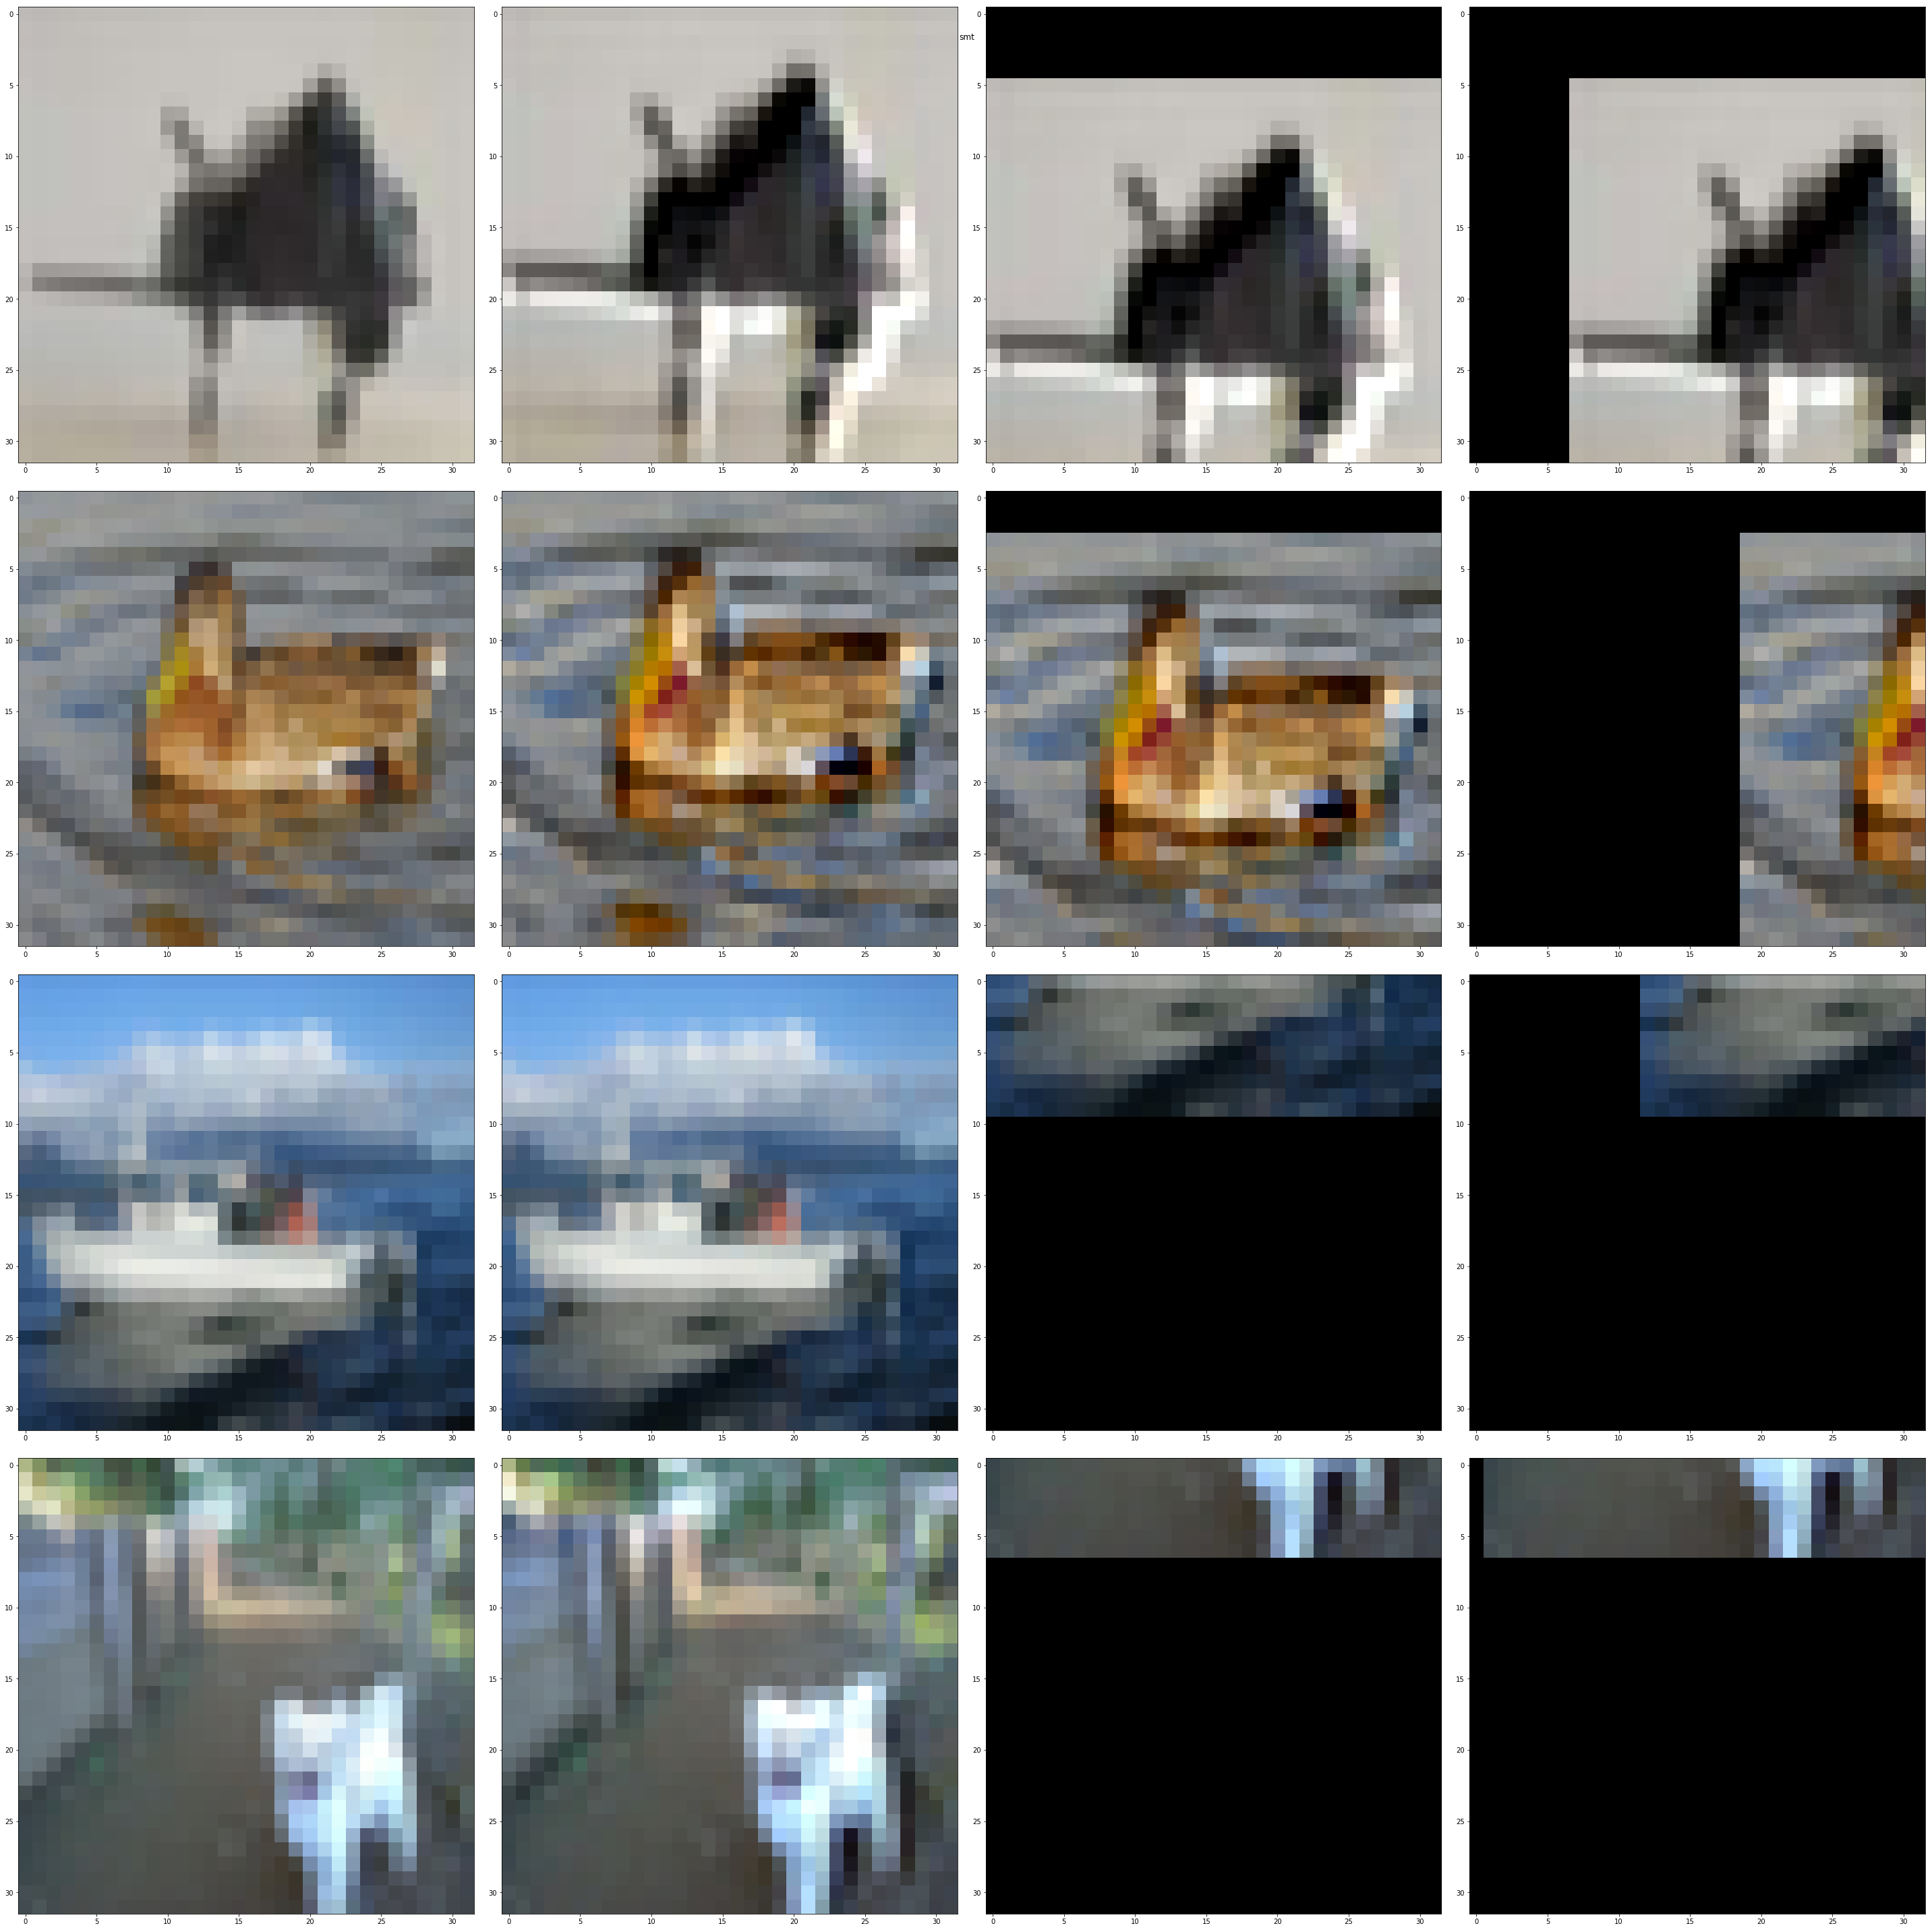

<Figure size 144x144 with 0 Axes>

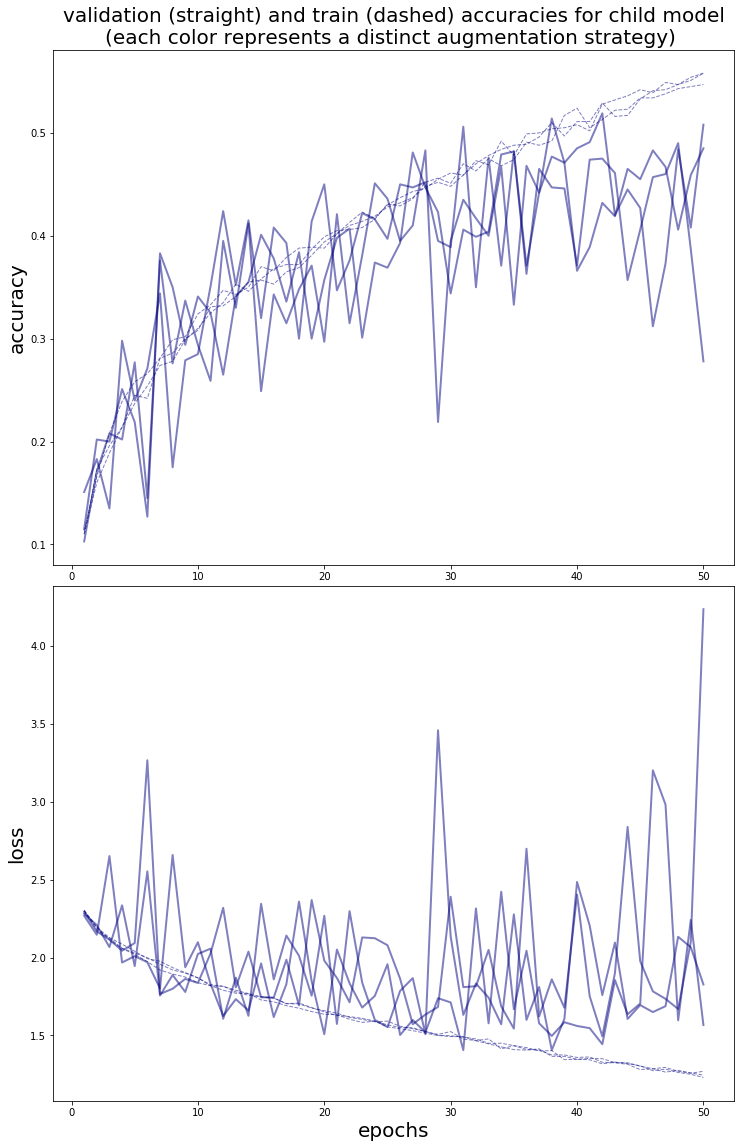

In [43]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[:5]:
    print ("trial_no:",i)
    display_augmentation_by_steps(i, non_overfitting_exp_df, data, nrows=4)
    # display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=2, ncols=4)
    plt.figure(figsize=(2,2))
    plot_exp_lines(exp_df[exp_df["trial_no"]==i])

In [44]:
non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward",ascending=False)[:15]

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward,epoch,acc_overfit,total_acc_overfit
18750,0.106,2.581,0.126,2.302,126,emboss,0.957,gamma-contrast,0.780,translate-x,0.508,0.981,1,0.496,0.0,-0.020,0.150
45150,0.106,2.304,0.153,2.291,302,invert,0.642,invert,0.974,emboss,0.138,0.979,1,0.491,0.0,-0.047,0.457
61950,0.096,2.473,0.111,2.302,414,invert,0.658,gamma-contrast,0.653,translate-y,0.030,0.886,1,0.489,0.0,-0.015,2.077
750,0.116,2.300,0.169,2.266,6,rotate,0.222,sharpen,0.903,emboss,0.613,0.902,1,0.489,0.0,-0.053,0.757
9750,0.110,2.300,0.103,2.282,66,emboss,0.278,translate-y,0.794,translate-x,0.616,0.985,1,0.489,0.0,0.007,0.162
84600,0.110,2.305,0.100,2.290,565,invert,0.789,invert,0.930,shear,0.033,0.736,1,0.488,0.0,0.010,1.265
22950,0.103,2.313,0.113,2.299,154,emboss,0.634,fog,0.882,emboss,0.520,0.985,1,0.488,0.0,-0.010,1.362
53850,0.101,2.323,0.138,2.295,360,rotate,0.587,gamma-contrast,0.986,crop,0.022,0.001,1,0.486,0.0,-0.037,0.067
49650,0.108,2.310,0.128,2.297,332,dropout,0.980,clouds,0.199,crop,0.016,0.921,1,0.486,0.0,-0.020,0.767
72750,0.097,2.358,0.106,2.303,486,invert,0.854,gamma-contrast,0.635,crop,0.265,0.865,1,0.483,0.0,-0.009,0.553


# Top-3 nonoverfitting policies curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
0,126,emboss,0.957,gamma-contrast,0.780,translate-x,0.508,0.981,0.496
1,302,invert,0.642,invert,0.974,emboss,0.138,0.979,0.491
2,414,invert,0.658,gamma-contrast,0.653,translate-y,0.030,0.886,0.489


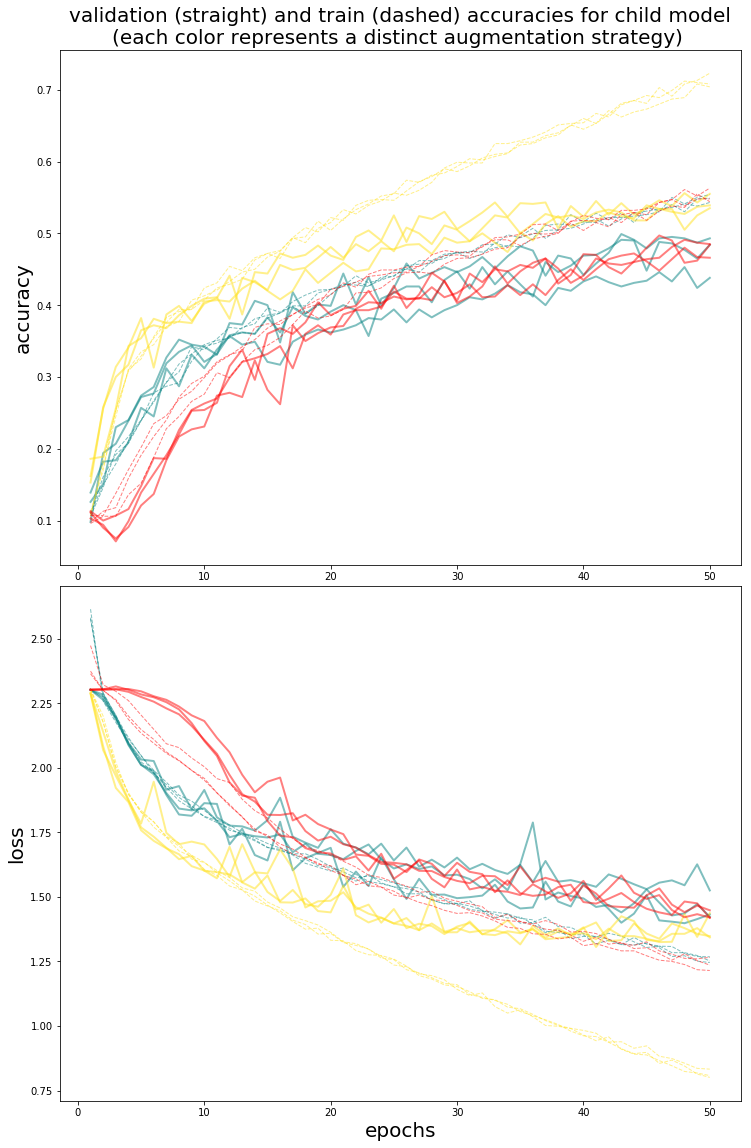

In [45]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])

In [ ]:
np.array_split(np.arange(8) , 20)

In [ ]:
rowList=[]
for x in range(len(exp_df["trial_no"].unique())):
    ind = x*50+49
    reward = exp_df.iloc[ind]["reward"]
    val_acc = exp_df.iloc[ind]["val_acc"]
    rowList.append([reward, val_acc])
rv_df = pd.DataFrame(rowList, columns=["reward","val_acc"])
rv_df.head()

In [ ]:
plt.scatter(rv_df["reward"],rv_df["val_acc"])